 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [20]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [21]:
# Reading whale returns
whale_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Display a few rows
whale_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [22]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [23]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [24]:
# Reading algorithmic returns
algo_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_df = pd.read_csv(algo_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [25]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [26]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [27]:
# Reading S&P 500 Closing Prices, sorting index
sp500_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [28]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [29]:
# Fix Data Types
sp500_df[sp500_df.columns[0:]] = sp500_df[sp500_df.columns[0:]].apply(lambda x: x.str.replace('$','')).astype('float')

In [30]:
sp500_df.dtypes

Close    float64
dtype: object

In [31]:
sp500_df.head()

Close
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06

In [32]:
sp500_df.sort_index(ascending=True, inplace=True)
sp500_df.head()

Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [33]:
# Calculate Daily Returns
SP500_df = sp500_df.pct_change()
SP500_df.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [34]:
# Drop nulls
SP500_df.dropna(inplace=True)
SP500_df.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [35]:
# Rename Column
SP500_df.columns = ['SP500']
SP500_df.head()

SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [36]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, SP500_df], axis="columns", join="inner")
combined_df.sort_index(inplace=True)
combined_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

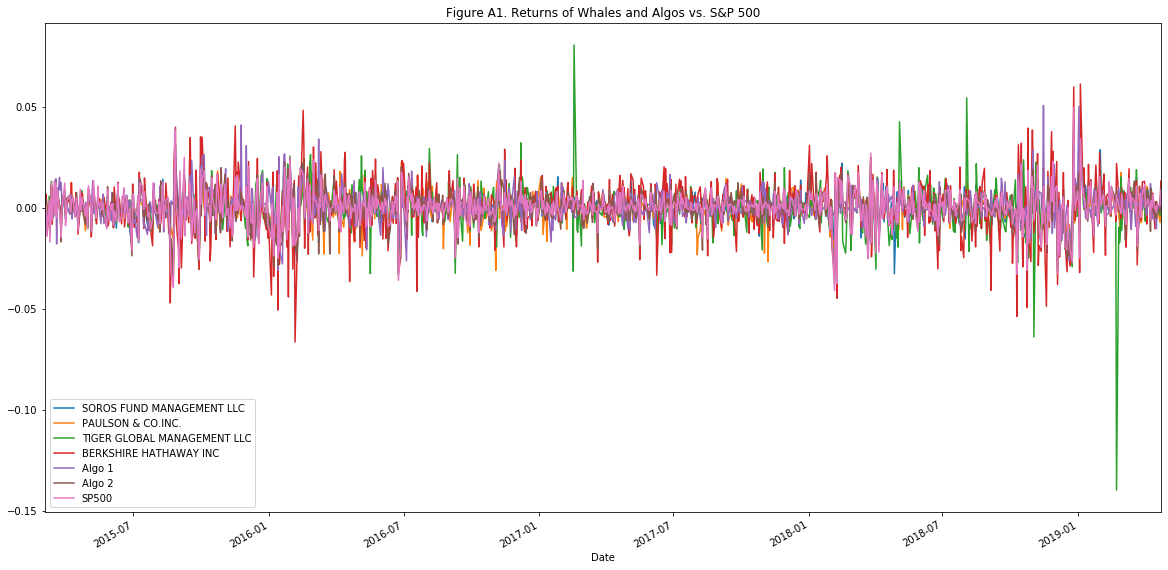

In [37]:
# Plot daily returns
ax_daily = combined_df.plot(figsize=(20,10), title='Figure A1. Returns of Whales and Algos vs. S&P 500')
ax_daily.legend(['SOROS FUND MANAGEMENT LLC',
                 'PAULSON & CO.INC.',
                 'TIGER GLOBAL MANAGEMENT LLC',
                 'BERKSHIRE HATHAWAY INC',
                 'Algo 1',
                 'Algo 2', 
                 'SP500'])

"""Based on Figure A1, Tiger Global Management LLC and Berkshire Hathaway Inc exhibited most volatile behavior in daily returns.
Comparable volatilities to S&P 500 are provided by Paulson & Co. Inc., Algo 1, Algo 2 and Soros Fund Management LLC. 
The daily returns of all portfolios are positively correlated.

Examples of exceptions are Tiger Global Management LLC's sudden rise in daily returns during the first quarter of 2017 
and its sharp dip towards the end of the first quarter in 2019."""

In [38]:
# Plot cumulative returns
cumulative_df = (1 + combined_df).cumprod()-1
cumulative_df.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-03-05                    -0.000681                0.004327 -0.011459   
2015-03-06                    -0.009156               -0.008828 -0.016359   
2015-03-09                    -0.003367               -0.010466 -0.021717   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.001464 -0.008907  
2015-03-05  0.005794 -0.007722  
2015-03-06 -0.005733 -0.021786  
2015-03-09 -0.004437 -0.017928

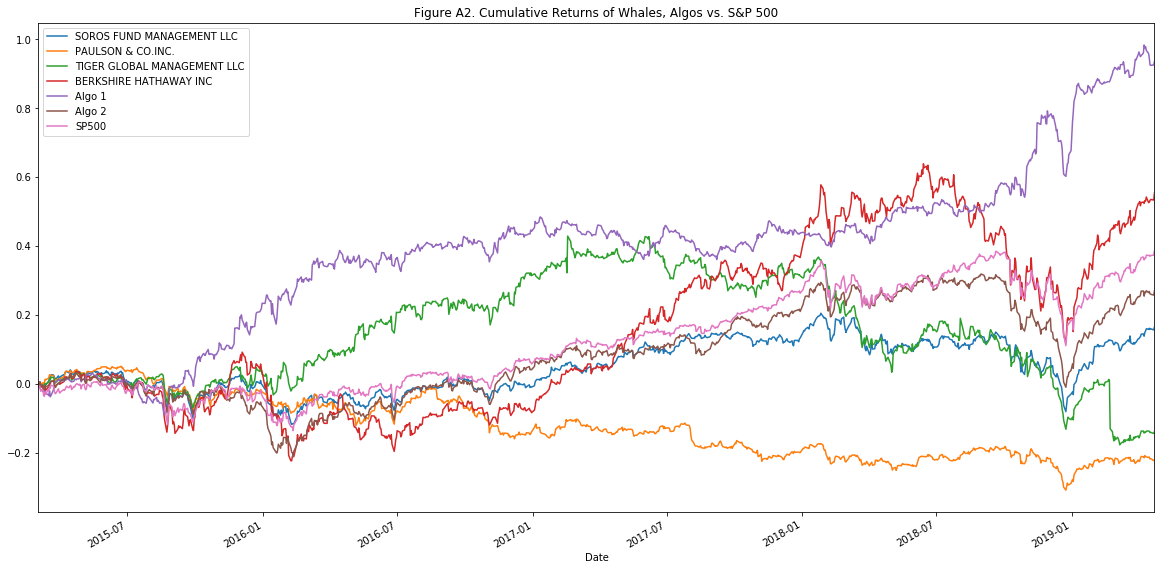

In [39]:
ax_cumulative = cumulative_df.plot(figsize=(20,10), title='Figure A2. Cumulative Returns of Whales, Algos vs. S&P 500')

ax_cumulative.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
Based on Figure A2, the plot for cumulative daily returns, 
Paulson & Co. Inc. from Whale Portfolio had the lowest cumulative return. 
The highest cumulative return was gained by Algo 2 from Algo Portfolio. 
S&P 500 ranks the third highest return by the end of April 2019.

Algo 1 and Berkshire Hathaway Inc outperforms S&P 500 by the end of 2019.
The best performance measured by cumulative returns was Algo 1. 
S&P 500 underperforms Algo 1 portfolio in three out of the four years.
2018 was the only year that S&P 500 outperforms Algo 1 by 0.1 approximately
in cumulative returns.

Algo 2 strategy returned slightly lower than that of S&P 500 thoughout the
four year window, with the gap widening starting from the second half of 2018.
It is followed by Soros Fund Management LLC and Tiger Global Management LLC. 
Cumulative returns gaps increased for both following a dip prior to the start 
of 2019. Paulson & Co. Inc. demonstrated decreasing cumulative returns during 
the entire time frame. 
"""

In [40]:
# Daily Returns:
# Whale Portfolio - Suppose equal weights for each of the four whale funds
weights = [.25, .25, .25, .25]
whale_daily = whale_df.dot(weights)
whale_daily.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

In [41]:
# Algo Portfolio - Suppose equal weights for each of the two algos
weights = [.5, .5]
algo_daily = algo_df.dot(weights)
whale_daily.head()

Date
2015-03-03   -0.003328
2015-03-04    0.001788
2015-03-05    0.004293
2015-03-06   -0.008265
2015-03-09    0.002249
dtype: float64

In [42]:
# Combined daily returns for Whale, Algo and S&P 500 Portfolios
combined_daily = pd.concat([whale_daily, algo_daily, SP500_df], axis="columns", join="inner")
combined_daily.sort_index(inplace=True)
combined_daily.columns = ['Whales_daily','Algo_daily','SP500_daily']
combined_daily.head()

Whales_daily  Algo_daily  SP500_daily
Date                                             
2015-03-03     -0.003328   -0.001446    -0.004539
2015-03-04      0.001788   -0.003086    -0.004389
2015-03-05      0.004293    0.001684     0.001196
2015-03-06     -0.008265   -0.008209    -0.014174
2015-03-09      0.002249   -0.002072     0.003944

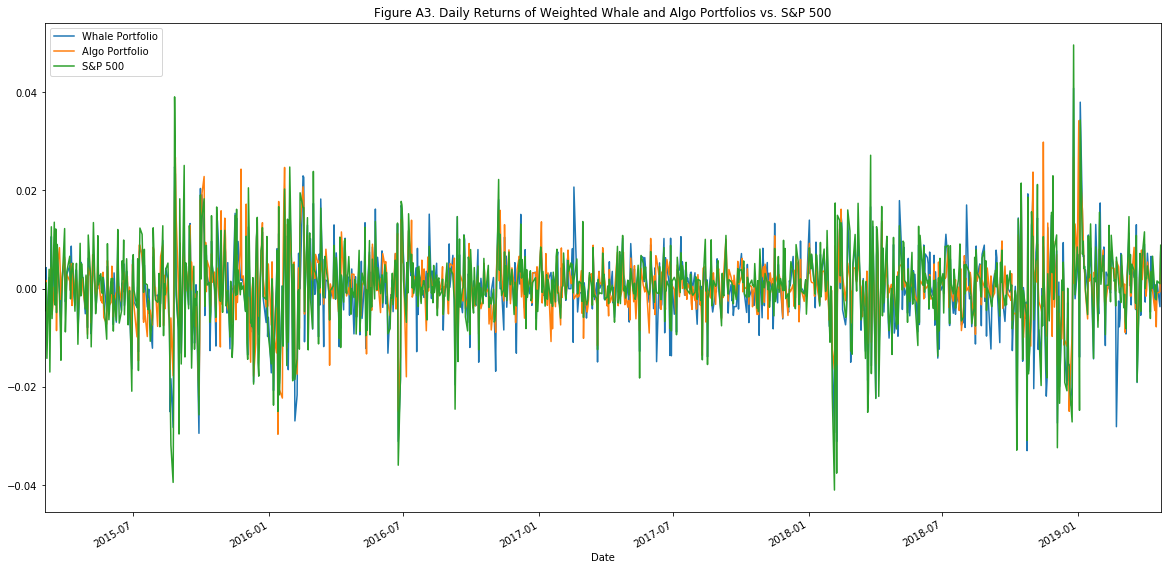

In [46]:
# Plot daily returns
ax_weighted_daily = combined_daily.plot(figsize=(20,10), title='Figure A3. Daily Returns of Weighted Whale and Algo Portfolios vs. S&P 500')
ax_weighted_daily.legend(['Whale Portfolio',
                 'Algo Portfolio',
                 'S&P 500'])

In [44]:
# Combined cumulative daily returns for weighted Whale, Algo Portfolios vs. S&P 500
cumulative_daily = (1 + combined_daily).cumprod()-1
cumulative_daily.head()

Whales_daily  Algo_daily  SP500_daily
Date                                             
2015-03-03     -0.003328   -0.001446    -0.004539
2015-03-04     -0.001546   -0.004528    -0.008907
2015-03-05      0.002741   -0.002851    -0.007722
2015-03-06     -0.005547   -0.011036    -0.021786
2015-03-09     -0.003310   -0.013085    -0.017928

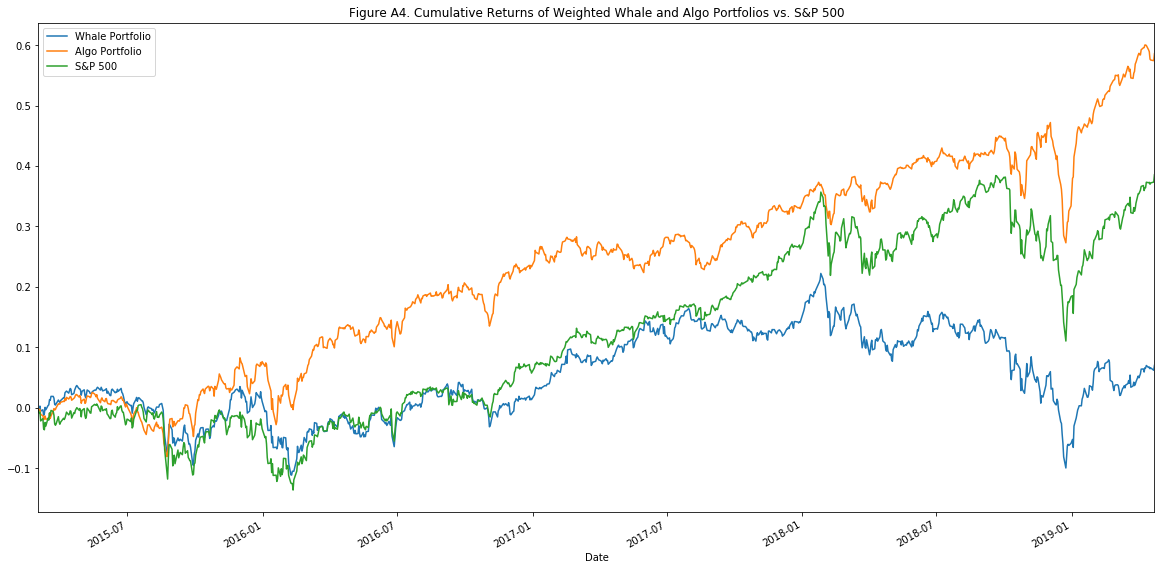

In [45]:
ax_weighted_cumulative = cumulative_daily.plot(figsize=(20,10), title='Figure A4. Cumulative Returns of Weighted Whale and Algo Portfolios vs. S&P 500')

ax_weighted_cumulative.legend(['Whale Portfolio',
                               'Algo Portfolio',
                               'S&P 500'])

"""
When made of equally weighted investment components of their kind, the Algo Portfolio is our top choice.

From Figure A3 and A4 above for daily and cumulative returns for weighted portfolios vs. S&P 500, 
Algo Portfolio consisted of equally weighted Algo 1 and Algo 2 strategies outperforms the market
indicated by cumulative returns of S&P 500 portfolio stocks. The portfolio of whale investors and management funds,
however, returned close to the market up until the last quarter of 2016. 
The gap in returns widened continuously into 2019.

the cumulative returns ranking from the highest to the lowest are:
Algo, S&P 500 and Whale Portfolio, respectively.

The chart on daily returns shows greatest volatility in the market, represented by S&P 500.
Algo Portfolio demonstrate the most modest risk. 
Portfolio composed of equally weighted whales investments shows volatility in beween the two.

In conclusion, Algo Portfolio is the safest bet amongst the three.
"""

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

"""
To start off, box plots for each portfolio are compared to others in the same domain.
The three domains are whale investors, algos and S&P 500.
"""

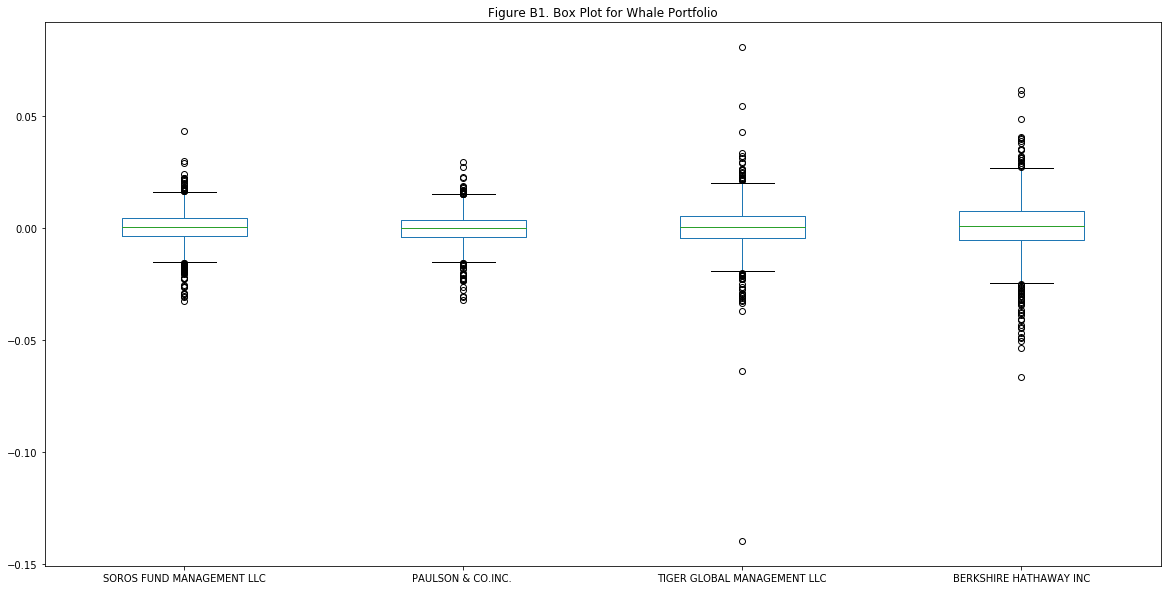

In [47]:
# Box plot to visually show risk
whale_df.plot.box(figsize=(20,10), title='Figure B1. Box Plot for Whale Portfolio')

"""
Tiger Gloabl Management LLC manifested the greatest risk in its portfolios, shown by the spread of daily returns.

Figure B1 shows the distribution in daily returns of strategies adopted by whale investors and their managed funds,
in the form of box plots. 

Paulson & Co. Inc. exhibit least spread in its daily returns, followed by Soros Fund Management LLC. 
Berkshire Hathaway Inc ranked the second most volatile of the four. 
"""

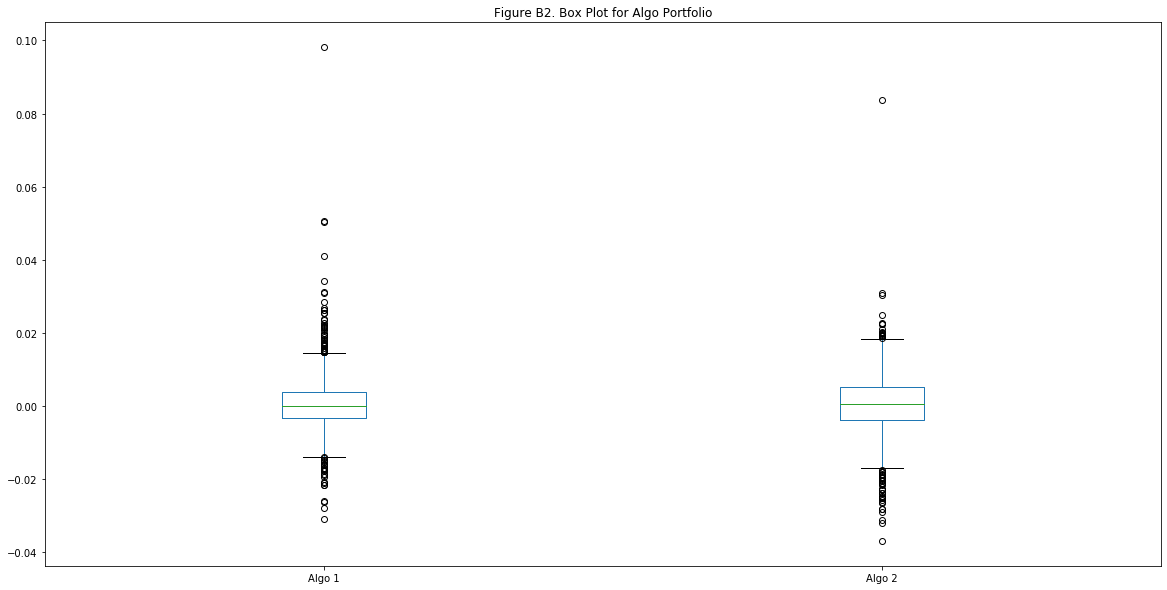

In [48]:
algo_df.plot.box(figsize=(20,10), title='Figure B2. Box Plot for Algo Portfolio')

"""
In Figure B2, we can conclude that the middle 50% of the daily returns for Algo 2 strategy is more spread out.
To the contrary, the daily returns for Algo 1 is more widely spread out compared to provided by Algo 2 strategy.
"""

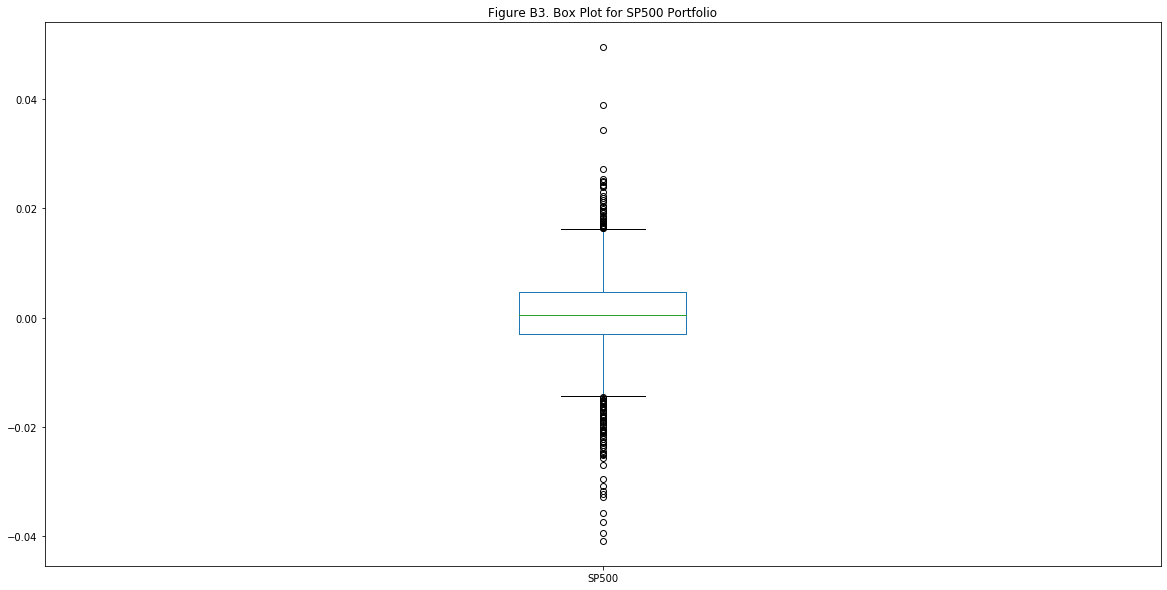

In [49]:
SP500_df.plot.box(figsize=(20,10), title='Figure B3. Box Plot for SP500 Portfolio')

"""
Figure B3 tells us that the range of middle half of market daily returns is slighly less than 0.01, based on S&P 500.
"""

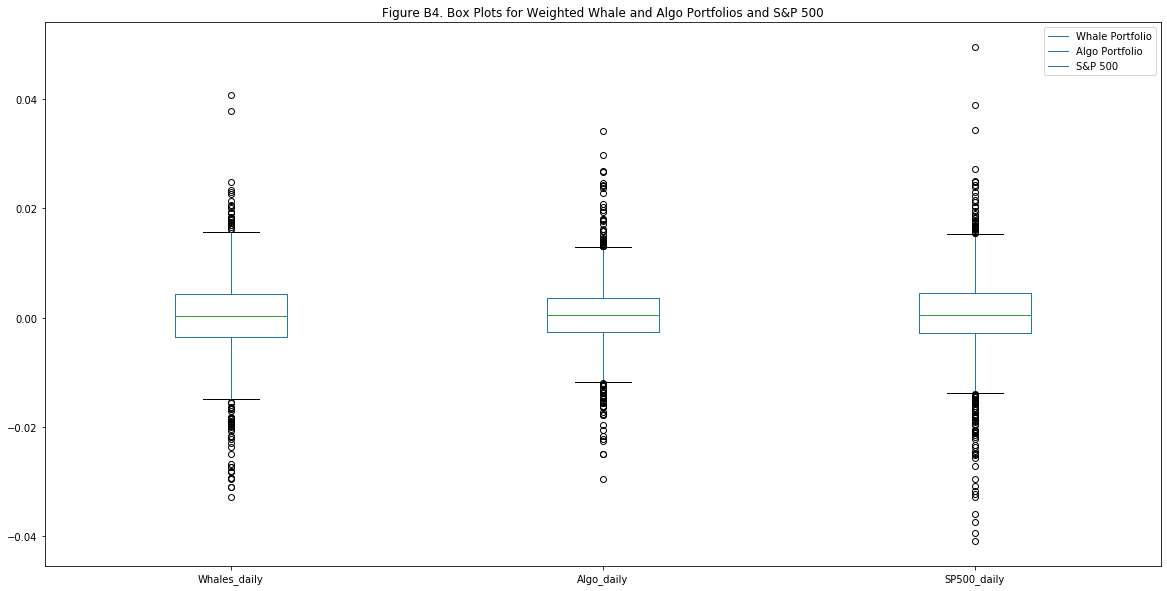

In [50]:
ax_boxplots = combined_daily.plot.box(figsize=(20,10), title='Figure B4. Box Plots for Weighted Whale and Algo Portfolios and S&P 500')

ax_boxplots.legend(['Whale Portfolio', 
           'Algo Portfolio', 
           'S&P 500'])

"""
According to Figure B4, Equally weighted algos portfolio is the less volatile than equally weighted whales portfolio. 
Both of them are less risky compared to the market, as suggested by the spreadout of daily returns in SP500 
over the same four-year time window.
"""

# Determine which portfolios are riskier than the S&P 500
""" 
For Weighted Whales and Algo Portfolios, based on the box plots in Figure B4 above, the Inter-quartile ranges (IQR = Q3-Q1) is the least (least volatile) for Algo Portfolio. It is about the same for Whales and S&P 500 Portfolios.
However, S&P 500 Portfoio has more outliers in its daily returns. 
Therefore, the risk associated with S&P 500 Portfolio is the highest,
followed by Whales. Algo Portfolio is the safest as suggested by its lowest volatility.

Here we are pooling all investments together in Figure B5 and examine box plots of daily returns for each. 
"""

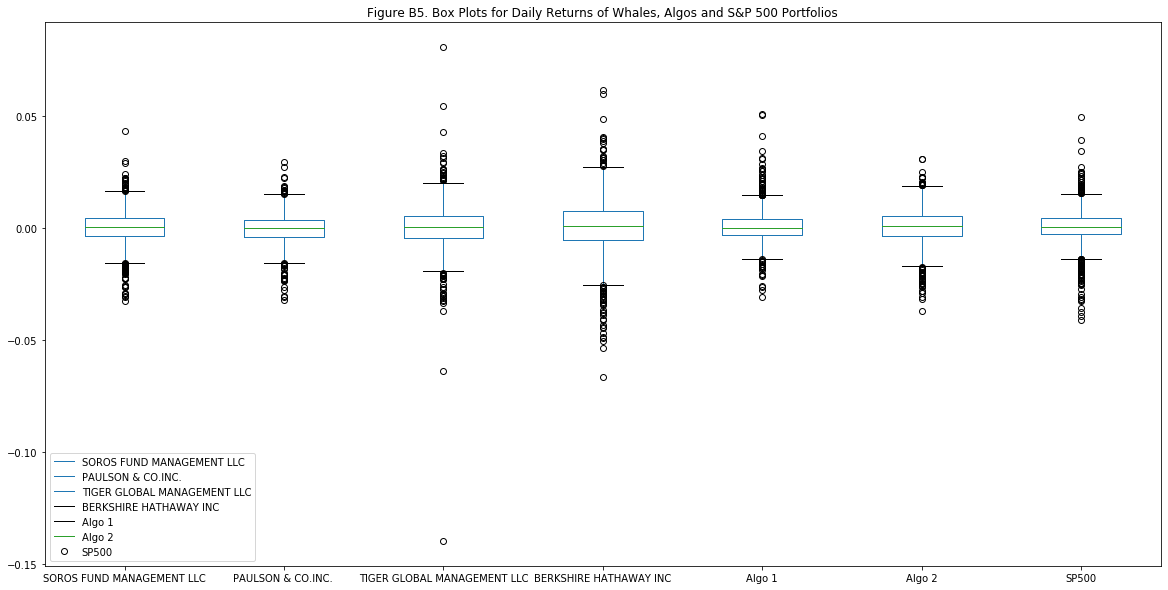

In [52]:
ax_boxplots = combined_df.plot.box(figsize=(20,10), title='Figure B5. Box Plots for Daily Returns of Whales, Algos and S&P 500 Portfolios')

ax_boxplots.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

# Determine which portfolios are riskier than the S&P 500
"""
The more spreadout the daily returns, the riskier the portfolio.

Based on the box plots in Figure B5, the Inter-quartile ranges (IQR = Q3-Q1) is the least (least volatile) 
for PAULSON & CO. INC., Algo 1, S&P 500, and SOROS FUND MANAGEMENT LLC. 
It suggests the middle half of the daily returns for those management strategies are less spreadout, 
i.e. less risky.

Meanwhile, the spread of daily returns is the most closely packed for PAULSON & CO. INC.,
suggesting that it is the least riskly out of the seven portfolios. Nevertheless, this alone 
does not guarantee a safer bet as rewards are not taken into account yet.
We will look into details of sharpe ratios in later sections.

Portfolios that have daily returns more widely spread out than market S&P 500 are:
BERKSHIRE HATHAWAY INC, TIGER GLOBAL MANAGEMENT LLC, and Algo 2.
The conclusion is reinforced by their standard deviations, of 0.0128, 0.0108 and 0.0084, respectively.
All three of them are higher than that of the 0.0081 for S&P 500 during the same timeframe."""

In [53]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# Daily standard deviation for Whale Portfolio
whale_std = whale_df.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [54]:
# Daily standard deviation, suppose equal weights for each of the composite
# weights = [.25, .25, .25, .25] for composites of Whale Portfolio
whale_weighted_std = whale_daily.std()
whale_weighted_std

0.007894995212497537

In [55]:
# Daily standard deviation for Algo Portfolio
algo_std = algo_df.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [56]:
algo_weighted_std = algo_daily.std()
algo_weighted_std

0.006752030964420867

In [57]:
# Daily standard deviation for S&P 500
SP500_std = SP500_df.std()
SP500_std

SP500    0.008111
dtype: float64

"""As proven by the numbers, the standard deviation of Algo Portfolio is 0.00675. 
It is the least among the three portfolios. The most risky one is S&P 500 Portfolio.
Its standard deviation on daily returns is 0.00811. The Whale Portfolio has risk
in the middle while closer to that of the S&P 500 Index Portfolio.
"""

In [58]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized standard deviation for Whale Portfolio
whale_volatility = whale_df.std() * np.sqrt(252)
whale_volatility.sort_values(inplace=True)
whale_volatility

PAULSON & CO.INC.              0.110754
SOROS FUND MANAGEMENT LLC      0.124487
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [59]:
whale_weighted_volatility = whale_weighted_std * np.sqrt(252)
whale_weighted_volatility

0.12532916360588414

In [60]:
# Annualized standard deviation for Algo Portfolio
algo_volatility = algo_df.std() * np.sqrt(252)
algo_volatility.sort_values(inplace=True)
algo_volatility

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [61]:
algo_weighted_volatility = algo_weighted_std * np.sqrt(252)
algo_weighted_volatility

0.10718516865879132

In [62]:
# Annualized standard deviation for S&P 500
SP500_volatility = SP500_df.std() * np.sqrt(252)
SP500_volatility.sort_values(inplace=True)
SP500_volatility

SP500    0.128762
dtype: float64

"""According to annualized standard deviations, 
the conclusion is consistent with those of the box plots and standard deviation of daily returns.
Portfolios of Algo 2, Tiger Global Management LLC and Berkshire Hathaway Inc are more risky compared to S&P 500 Portfolio.

If weighted equally among the portfolios of their types, 
S&P 500 Portfolio is the most risky of the three. Algo Portfolio is the safest and least volatile.
Whale Portfolio has risk close to S&P 500 while remaining in the middle of the three."""

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

In [63]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
SP500_rolling_std = SP500_df.rolling(window=21).std()
SP500_rolling_std.head(23)

SP500
Date                
2012-10-02       NaN
2012-10-03       NaN
2012-10-04       NaN
2012-10-05       NaN
2012-10-08       NaN
2012-10-09       NaN
2012-10-10       NaN
2012-10-11       NaN
2012-10-12       NaN
2012-10-15       NaN
2012-10-16       NaN
2012-10-17       NaN
2012-10-18       NaN
2012-10-19       NaN
2012-10-22       NaN
2012-10-23       NaN
2012-10-24       NaN
2012-10-25       NaN
2012-10-26       NaN
2012-10-31       NaN
2012-11-01  0.007183
2012-11-02  0.007427
2012-11-05  0.007388

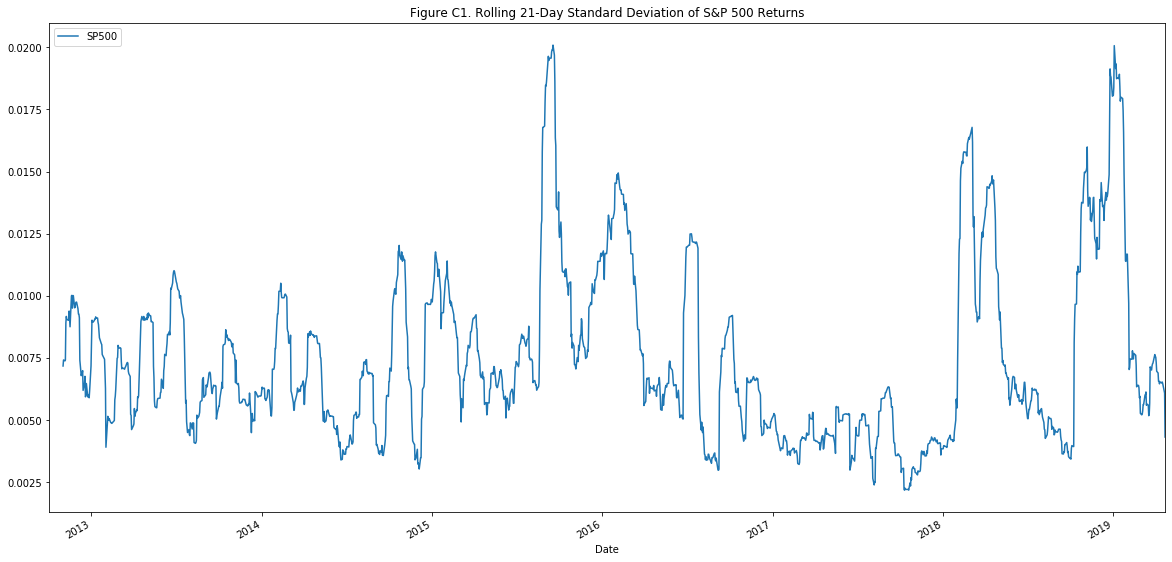

In [64]:
SP500_rolling_std.plot(figsize=(20, 10), title='Figure C1. Rolling 21-Day Standard Deviation of S&P 500 Returns')

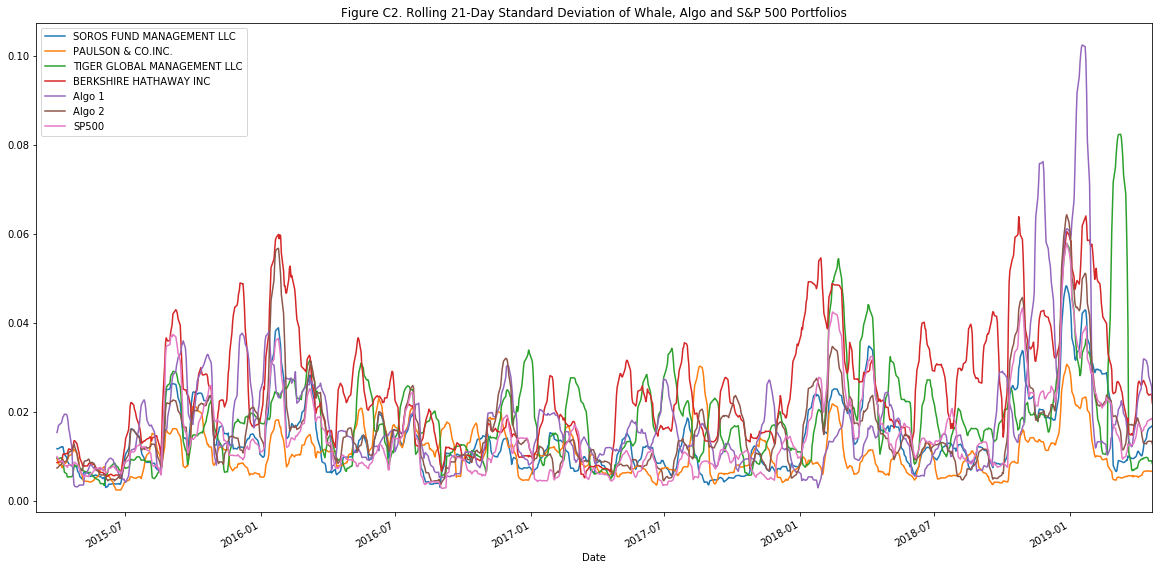

In [65]:
# Whales Portfolio 21-day Rolling standard deviation
ax_rolling_std = cumulative_df.rolling(window=21).std().plot(figsize=(20,10), title='Figure C2. Rolling 21-Day Standard Deviation of Whale, Algo and S&P 500 Portfolios')

ax_rolling_std.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
Higher standard deviation suggest greater variation in daily returns. It is associated with higher risks.
A rolling 21-day standard deviation smoothes out the daily standard deviation plot, making it easier to identify trends.

Plots on rolling 21-day standard deviations of the market and portfolios in Figure C1 and C2 suggests higher-than-market risks for 
Tiger Global Management LLC and Berkshire Hathaway Inc. The risk for Algo 1 strategy was seeing higher than the rest more often 
starting from the fourth quarter of 2018.
"""

In [66]:
# Correlation
correlation = combined_df.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
SP500                                         0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
SP500                                           0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
SP500                                      0.751371  0.279494  0.858764   

                                SP500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
SP500                        1.000000

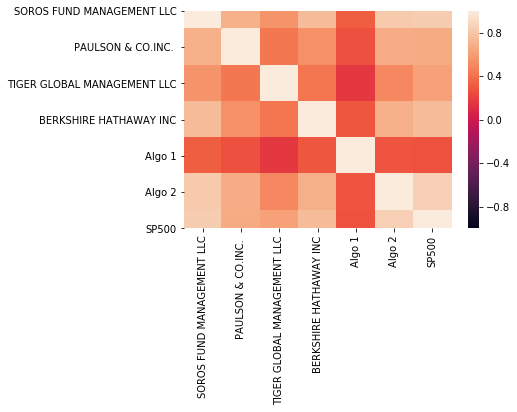

In [67]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

"""Based on the correlation chart and heatmap, all portfolios are positively correlated with S&P 500.
Algo 2 portfolio most closely mimic the movement of S&P 500, given its 0.859 correlation. 
It is followed by Soros Fund Management LLC and Berkshire Hathaway Inc. with
S&P 500 correlations of 0.838 and 0.751 respectively.
On the other hand, Algo 1 least tracks S&P 500, provided that it has correlation of 0.279.
Paulson & Co. Inc. and Tiger Global Management LLC both have correlations greater than 0.6 with S&P 500 Index."""

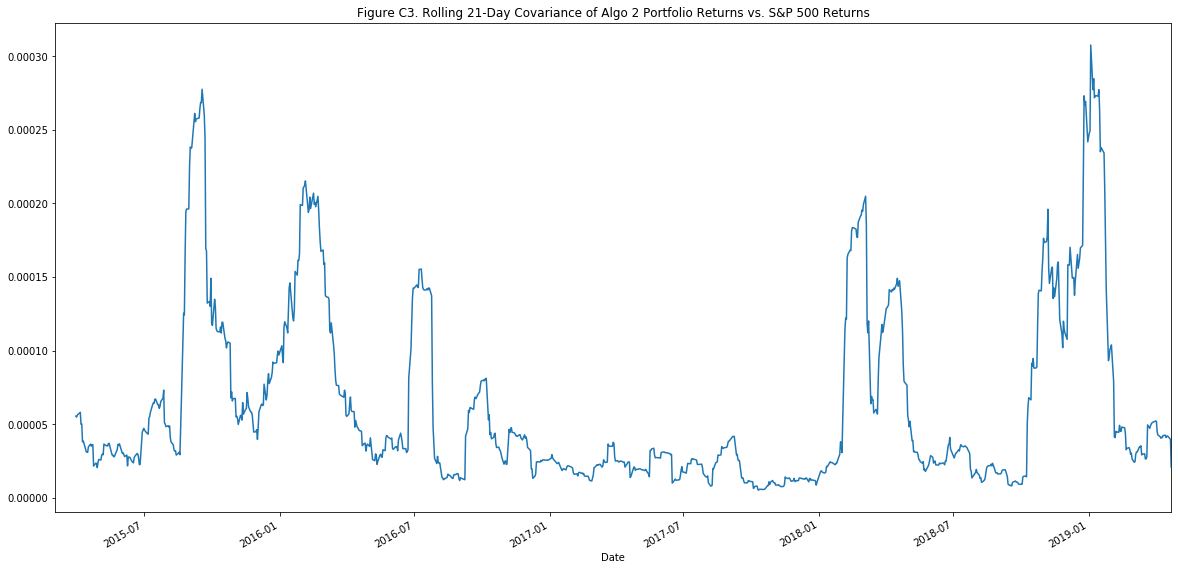

In [69]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# Algo 2 is chosen to be analyzed based on its sensitivity to S&P 500 movements, indicated by rolling 21-day portfolio returns
Algo2_covariance = combined_df['Algo 2'].rolling(window=21).cov(combined_df['SP500'])
Algo2_covariance.plot(figsize=(20, 10), 
                        title='Figure C3. Rolling 21-Day Covariance of Algo 2 Portfolio Returns vs. S&P 500 Returns')

In [70]:
variance = combined_df['SP500'].rolling(window=21).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000042
2019-04-17    0.000043
2019-04-18    0.000042
2019-04-22    0.000037
2019-04-23    0.000019
Name: SP500, Length: 1043, dtype: float64

In [71]:
Algo2_beta = Algo2_covariance / variance
Algo2_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.967378
2019-04-17    0.977446
2019-04-18    1.000701
2019-04-22    1.068306
2019-04-23    1.106685
Length: 1043, dtype: float64

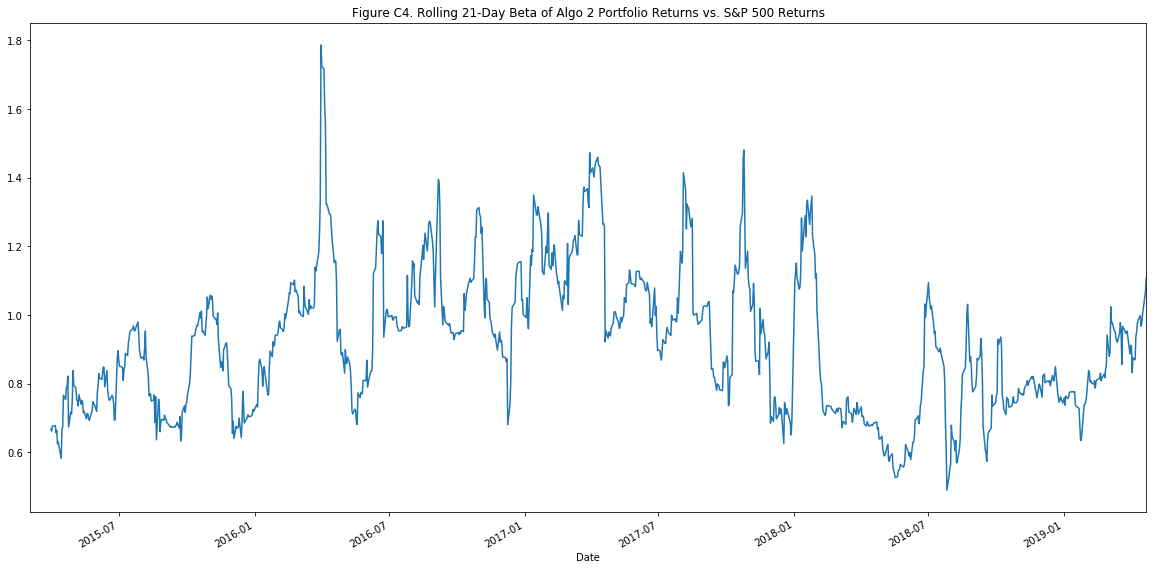

In [72]:
Algo2_beta.plot(figsize=(20, 10), 
                        title='Figure C4. Rolling 21-Day Beta of Algo 2 Portfolio Returns vs. S&P 500 Returns') 

"""
In Figure C4. above, Algo 2 is sensitive to movements of S&P 500 as its beta is wavering around 1 that is the beta for S&P 500. 
It is moving in the same direction with S&P movements. On maximum, it reacts 1.8 times to S&P 500 movement. 
To the contrary, it could move as litte as between a half to two thirds of the size of movements in S&P 500.
However, on average, it does not appear to be overly or less responsive to movements of S&P 500 in the given time span. 
"""

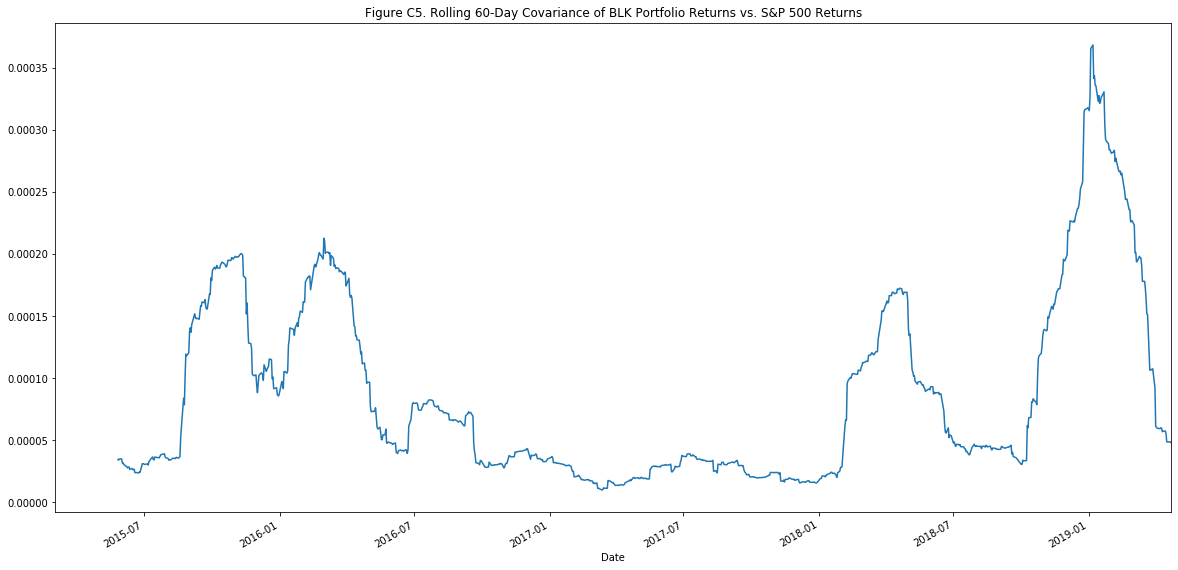

In [82]:
# Calculate 60-day Beta for Berkshire Hathaway Inc compared to the total market (S&P 500)
BRK_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['SP500'])
BRK_covariance.plot(figsize=(20, 10), 
                        title='Figure C5. Rolling 60-Day Covariance of BLK Portfolio Returns vs. S&P 500 Returns')

In [83]:
variance_rolling60 = combined_df['SP500'].rolling(window=60).var()
variance_rolling60

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: SP500, Length: 1043, dtype: float64

In [84]:
BRK_beta = BRK_covariance / variance_rolling60
BRK_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 1043, dtype: float64

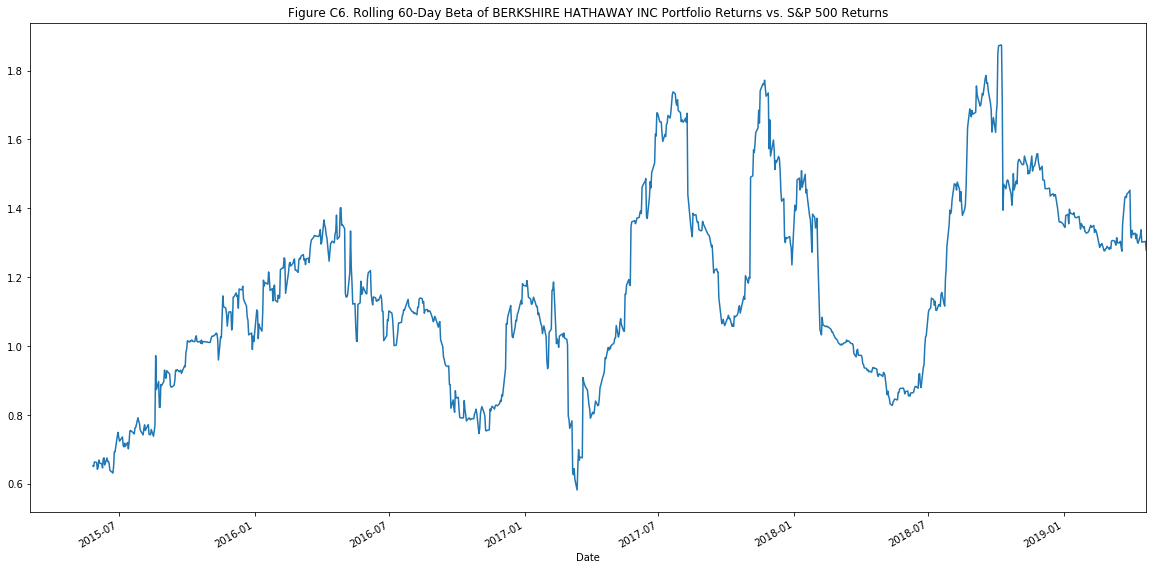

In [85]:
BRK_beta.plot(figsize=(20, 10), 
                        title='Figure C6. Rolling 60-Day Beta of BERKSHIRE HATHAWAY INC Portfolio Returns vs. S&P 500 Returns') 

"""
According to Figure C6, the 60-day rolling beta measures sensitivity of the stock price Berkshire Hathaway Inc. 
relative to movements of S&P 500 market index. 
It moves in concert with S&_ 500 in the same directions and approximately the same average sale in sensitivity. 
As show in the graph, the two-month rolling beta ranges from as low as 0.6 around March 2017 
to its peak near 1.9 close to October 2018.
In the chart, it started around 0.7 from July 2015, followed by an increase to 1.4 in April 2016.
It peaked close to 1.8 twice in July and December 2017, preceded by gradual declines, as previously mentioned, 
to its minimum towards the end of 2018. The market sensitivity falls close to 0.8 in July 2018. Then, 
it rose by 1 to its peak, i.e. most sensitive moment at the end of 2018. 
A gradual decline by 0.5 was seen in the first quarter of 2019.
"""

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [86]:
import math
alpha = 1-math.e**(math.log(0.5)/21)
alpha

0.032468221476108394

In [87]:
com=1/alpha-1
com

29.799346392775035

In [88]:
span = 2/alpha -1
span

60.59869278555007

In [89]:
# Exponential Weighted Average
# ewm(self, com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)[source]¶
combined_rolling_ewm = combined_df.ewm(halflife=21,axis=1).mean()
combined_rolling_ewm.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.003154   
2015-03-04                   0.002230            0.002744   
2015-03-05                   0.004016            0.004047   
2015-03-06                  -0.007905           -0.005704   
2015-03-09                   0.000582            0.002434   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.002238               -0.003375 -0.003069   
2015-03-04                     0.000926                0.001789 -0.000426   
2015-03-05                     0.003464                0.004320  0.003194   
2015-03-06                    -0.006660               -0.008350 -0.007626   
2015-03-09                     0.003608                0.002227  0.000589   

              Algo 2     SP500  
Date                            
2015-03-03 -0.002686 -0.002978  
2015-03-04  0.000088 -0.000617  
2015-03-05  0.003398  0.003052  
2015-03-06 -0.008319 -0.009240  
2015-03-09  0.000718  0.001226

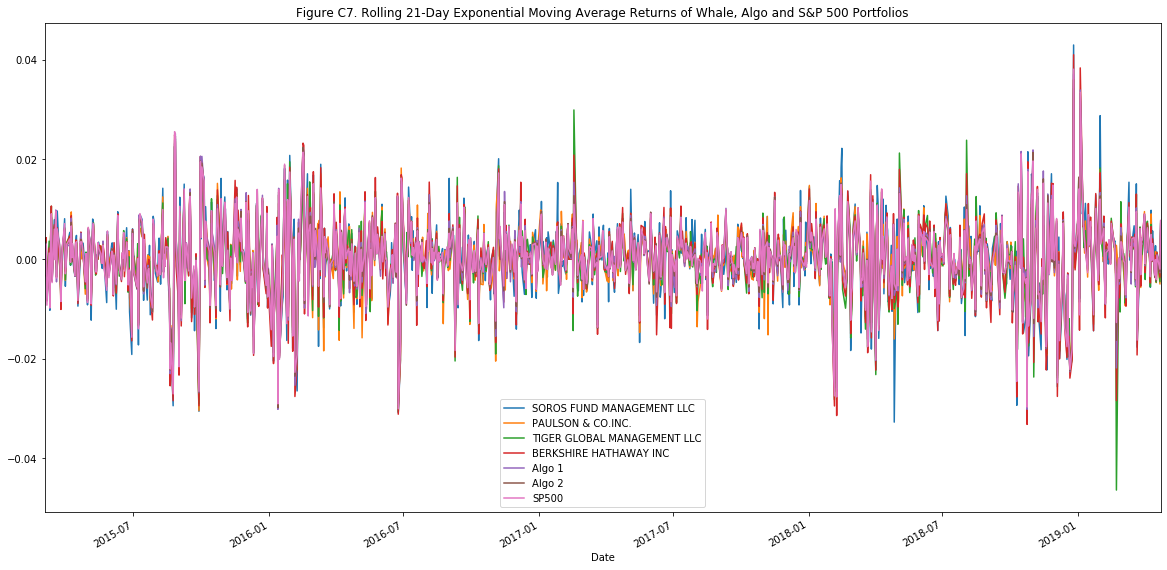

In [96]:
ax_ewm = combined_rolling_ewm.plot(figsize=(20,10), title='Figure C7. Rolling 21-Day Exponential Moving Average Returns of Whale, Algo and S&P 500 Portfolios')

ax_ewm.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

In [92]:
combined_rolling_ewm_std = combined_df.ewm(halflife=21,axis=1).std()
combined_rolling_ewm_std.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN            0.002627   
2015-03-04                        NaN            0.000715   
2015-03-05                        NaN            0.000042   
2015-03-06                        NaN            0.003063   
2015-03-09                        NaN            0.002576   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.002406                0.002939  0.002608   
2015-03-04                     0.003113                0.003024  0.005418   
2015-03-05                     0.000985                0.001840  0.002888   
2015-03-06                     0.002688                0.003929  0.003715   
2015-03-09                     0.002683                0.003445  0.004595   

              Algo 2     SP500  
Date                            
2015-03-03  0.002480  0.002360  
2015-03-04  0.004952  0.004816  
2015-03-05  0.002605  0.002512  
2015-03-06  0.003670  0.004043  
2015-03-09  0.004087  0.003911

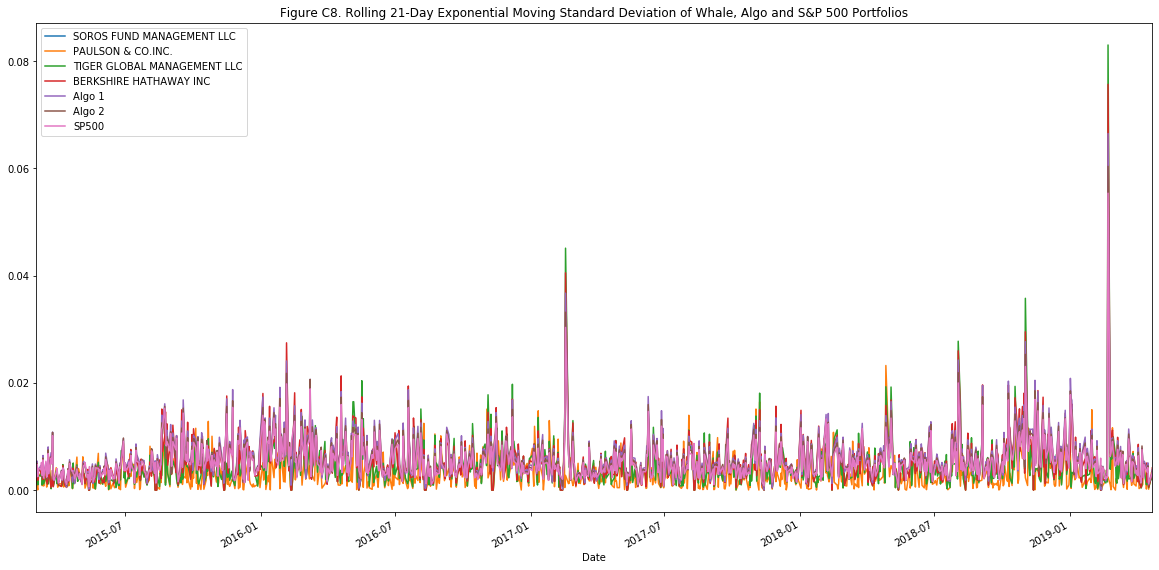

In [97]:
ax_ewm_std = combined_rolling_ewm_std.plot(figsize=(20,10), title='Figure C8. Rolling 21-Day Exponential Moving Standard Deviation of Whale, Algo and S&P 500 Portfolios')

ax_ewm_std.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

In [94]:
correlation_ewm = combined_rolling_ewm.corr()
correlation_ewm

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.928623   
PAULSON & CO.INC.                             0.928623            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.866161            0.900928   
BERKSHIRE HATHAWAY INC                        0.898622            0.902948   
Algo 1                                        0.885527            0.889415   
Algo 2                                        0.904450            0.906044   
SP500                                         0.907938            0.906123   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.866161   
PAULSON & CO.INC.                               0.900928   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.947995   
Algo 1                                          0.921448   
Algo 2                                          0.921747   
SP500                                           0.921150   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.898622  0.885527  0.904450   
PAULSON & CO.INC.                          0.902948  0.889415  0.906044   
TIGER GLOBAL MANAGEMENT LLC                0.947995  0.921448  0.921747   
BERKSHIRE HATHAWAY INC                     1.000000  0.975237  0.973622   
Algo 1                                     0.975237  1.000000  0.991374   
Algo 2                                     0.973622  0.991374  1.000000   
SP500                                      0.972174  0.982999  0.996113   

                                SP500  
SOROS FUND MANAGEMENT LLC    0.907938  
PAULSON & CO.INC.            0.906123  
TIGER GLOBAL MANAGEMENT LLC  0.921150  
BERKSHIRE HATHAWAY INC       0.972174  
Algo 1                       0.982999  
Algo 2                       0.996113  
SP500                        1.000000

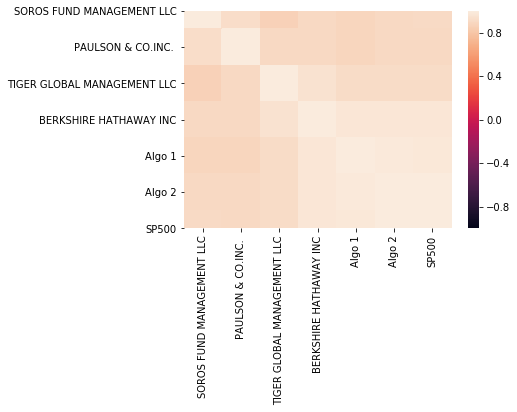

In [95]:
sns.heatmap(correlation_ewm, vmin=-1, vmax=1)

"""
According to Figure C7 and C8, returns of Tiger Global Management LLC and Berkshire Hathaway Inc 
were more volatile, in other words, riskier than the market index, S&P 500.

Based on heatmap and correlation table above, returns of portfolios and S&P 500 are highly correlated.
Algo 2 exhibit maximum correlation with S&P 500, namely 99.6% of its returns can be explained by that of S&P 500 .
On the other hand, 90.6% of Paulson & Co. Inc's daily prices can be explained by S&P 500. 
It is the least correlated with S&P 500. """

In [98]:
Algo2_ewm_covariance = combined_rolling_ewm['Algo 2'].rolling(window=21).cov(combined_rolling_ewm['SP500'])
variance_ewm = combined_rolling_ewm['SP500'].rolling(window=21).var()
Algo2_ewm_beta = Algo2_ewm_covariance / variance_ewm

In [99]:
Algo2_ewm_beta.head(30)

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
2015-03-11         NaN
2015-03-12         NaN
2015-03-13         NaN
2015-03-16         NaN
2015-03-17         NaN
2015-03-18         NaN
2015-03-19         NaN
2015-03-20         NaN
2015-03-23         NaN
2015-03-24         NaN
2015-03-25         NaN
2015-03-26         NaN
2015-03-27         NaN
2015-03-30         NaN
2015-03-31    0.896434
2015-04-01    0.894753
2015-04-02    0.895164
2015-04-06    0.891807
2015-04-07    0.886265
2015-04-08    0.898390
2015-04-09    0.902066
2015-04-10    0.900946
2015-04-13    0.903526
2015-04-14    0.898439
dtype: float64

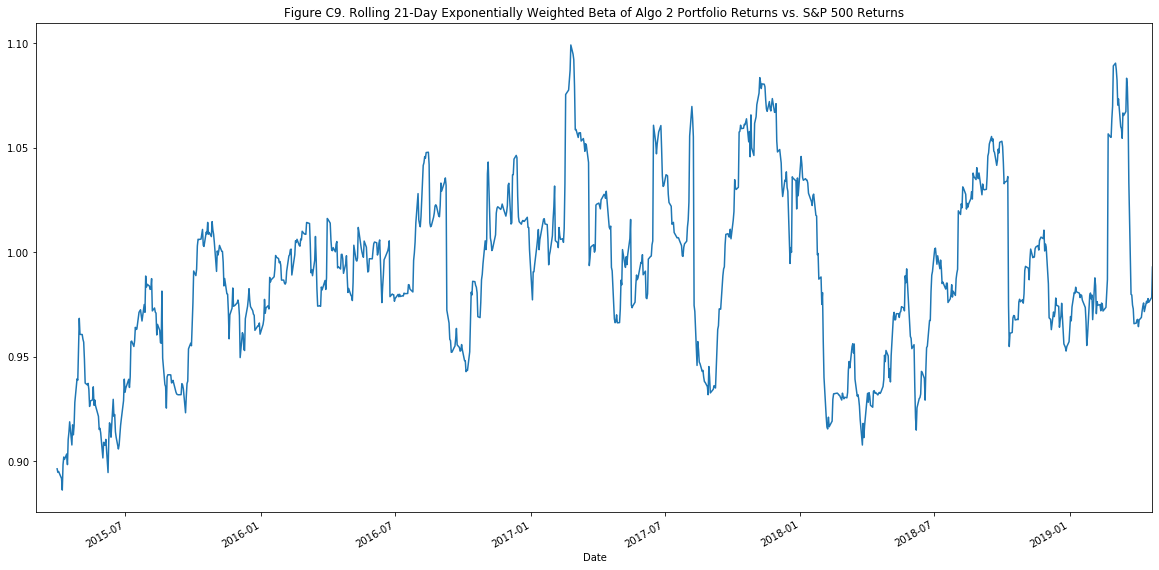

In [101]:
Algo2_ewm_beta.plot(figsize=(20, 10), 
                        title='Figure C9. Rolling 21-Day Exponentially Weighted Beta of Algo 2 Portfolio Returns vs. S&P 500 Returns') 

"""
Figure C9 shows that Algo 2 portfolio has nearly the same sensitivity to price movement of S&P 500. 
It is because its exponentially weighted beta is close to 1, the index base. 
Meanwhile, its average appears to be below 1, indicating that Algo 2 is relatively
less sensitive to price movements of S&P 500. """

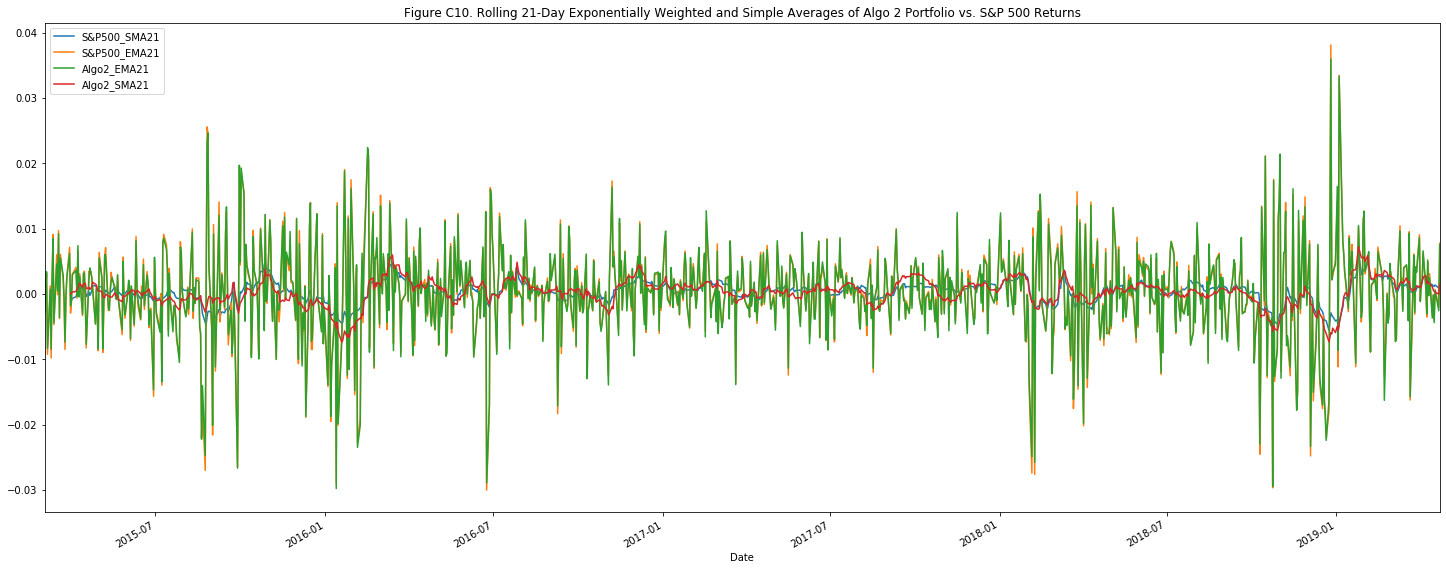

In [102]:
# Set figure of the SMA 21-day closing prices of S&P 500
mychart = combined_df['SP500'].rolling(window=21).mean().plot(figsize=(25,10), 
                                    title='Figure C10. Rolling 21-Day Exponentially Weighted and Simple Averages of Algo 2 Portfolio vs. S&P 500 Returns')

# Overlay EMA21 and SMA21 of Algo 2, and EMA of S&P 500 on the same figure
combined_rolling_ewm['SP500'].plot(ax=mychart)
combined_rolling_ewm["Algo 2"].plot(ax=mychart)
combined_df['Algo 2'].rolling(window=21).mean().plot(ax=mychart)

# Set the legend of the figure
mychart.legend(["S&P500_SMA21", "S&P500_EMA21", "Algo2_EMA21", "Algo2_SMA21"])

"""From the overlaying chart Figure C10, above, we can see that the both EMAs and SMAs indicate that 
Algo 2 price movements closely traces those of S&P 500. 
The EMAs have a higher correlation than SMAs as more closing prices agrees with each other
based on movement in the same direction and similar magnitude. 
The range of 21-day EMAs exceed that of the SMAs over the same period of time 
because it weighs recent price movements more heavily. In comparison, 
SMAs averages out price movement over the specified 21 days."""

In [103]:
# Exponentially Weighted Average for 60-day rolling beta of Berkshire Hathaway Inc.
alpha_BRK = 1-math.e**(math.log(0.5)/61)
alpha_BRK

0.011298752709394733

In [104]:
com_BRK=1/alpha_BRK-1
com_BRK

87.50534441456675

---

In [105]:
span_BRK = 2/alpha_BRK -1
span_BRK

176.0106888291335

In [106]:
# Exponential Weighted Average
# ewm(self, com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0)[source]¶
combined_rolling60_ewm = combined_df.ewm(halflife=60,axis=1).mean()
combined_rolling60_ewm.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.003134   
2015-03-04                   0.002230            0.002739   
2015-03-05                   0.004016            0.004046   
2015-03-06                  -0.007905           -0.005727   
2015-03-09                   0.000582            0.002414   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.002244               -0.003344 -0.003057   
2015-03-04                     0.000961                0.001788 -0.000336   
2015-03-05                     0.003476                0.004303  0.003227   
2015-03-06                    -0.006656               -0.008294 -0.007611   
2015-03-09                     0.003570                0.002242  0.000668   

              Algo 2     SP500  
Date                            
2015-03-03 -0.002696 -0.002968  
2015-03-04  0.000136 -0.000533  
2015-03-05  0.003415  0.003087  
2015-03-06 -0.008272 -0.009144  
2015-03-09  0.000777  0.001246

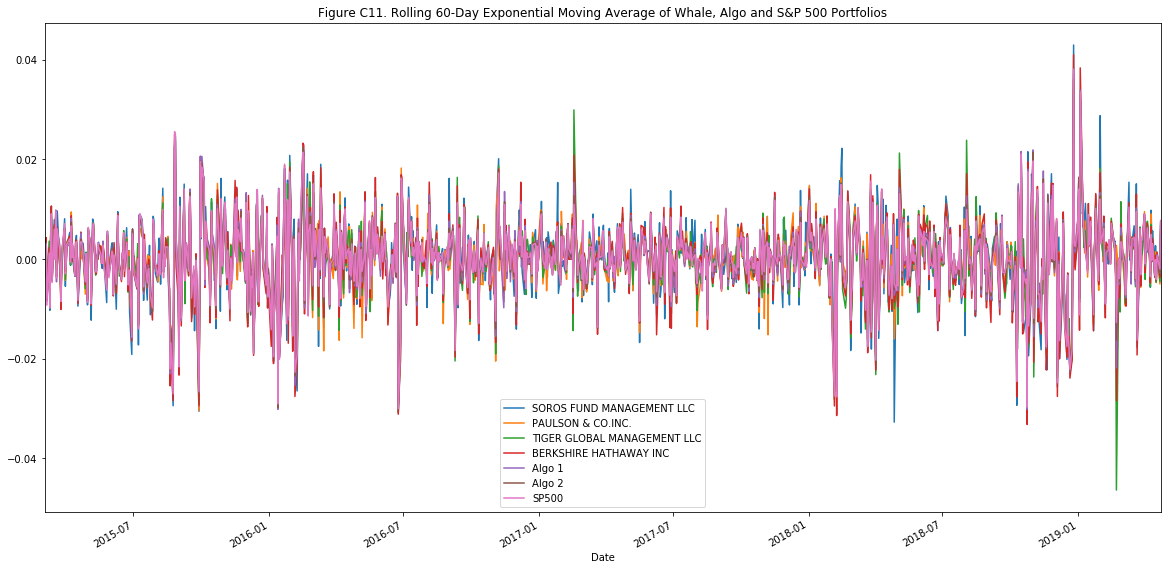

In [107]:
ax_rolling60_ewm = combined_rolling_ewm.plot(figsize=(20,10), title='Figure C11. Rolling 60-Day Exponential Moving Average of Whale, Algo and S&P 500 Portfolios')

ax_rolling60_ewm.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

In [108]:
combined_rolling60_ewm_std = combined_df.ewm(halflife=60,axis=1).std()
combined_rolling60_ewm_std.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN            0.002627   
2015-03-04                        NaN            0.000715   
2015-03-05                        NaN            0.000042   
2015-03-06                        NaN            0.003063   
2015-03-09                        NaN            0.002576   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.002401                0.002924  0.002603   
2015-03-04                     0.003094                0.003003  0.005351   
2015-03-05                     0.000980                0.001819  0.002845   
2015-03-06                     0.002684                0.003908  0.003695   
2015-03-09                     0.002691                0.003420  0.004555   

              Algo 2     SP500  
Date                            
2015-03-03  0.002479  0.002365  
2015-03-04  0.004906  0.004790  
2015-03-05  0.002577  0.002495  
2015-03-06  0.003659  0.004026  
2015-03-09  0.004071  0.003899

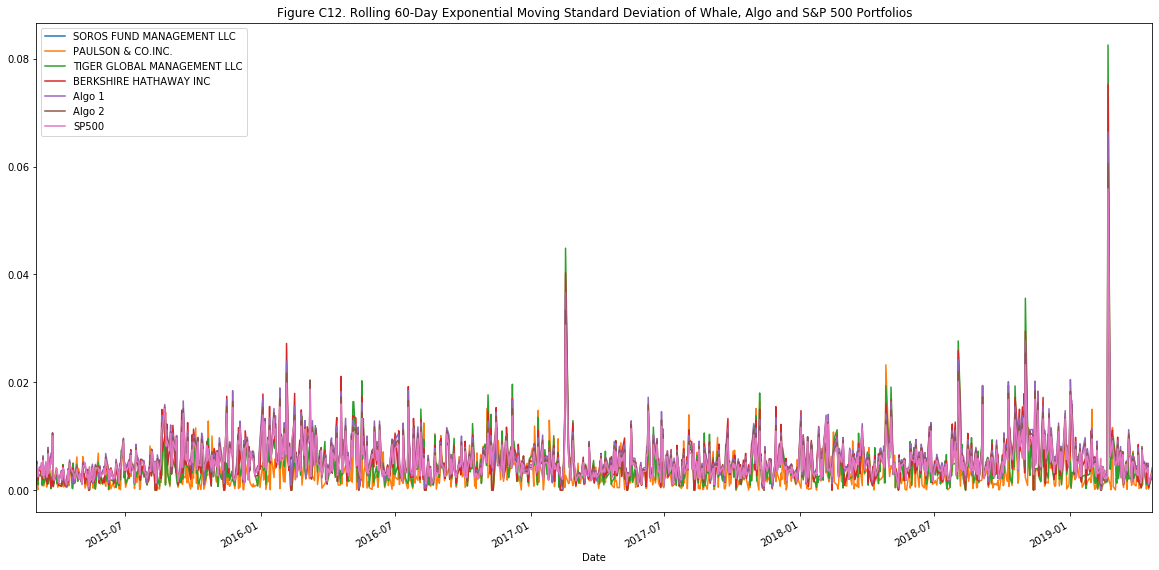

In [109]:
ax_rolling60_ewm_std = combined_rolling60_ewm_std.plot(figsize=(20,10), title='Figure C12. Rolling 60-Day Exponential Moving Standard Deviation of Whale, Algo and S&P 500 Portfolios')

ax_rolling60_ewm_std.legend(['SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
Exponentially weighted daily returns and standard deviations, shown in Figure C11 and C12 above, reinforce our conclusion 
that the portfolios of Tiger Global Management LLC and Berkshire Hathaway are riskier than S&P 500. 
In addition, Soros Fund Management LLC also adopts a riskier portfolio, compared to the market S&P 500. 
"""

In [110]:
correlation_rolling60_ewm = combined_rolling60_ewm.corr()
correlation_rolling60_ewm

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.930282   
PAULSON & CO.INC.                             0.930282            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.869990            0.904866   
BERKSHIRE HATHAWAY INC                        0.900839            0.906526   
Algo 1                                        0.888924            0.894131   
Algo 2                                        0.906289            0.909255   
SP500                                         0.909444            0.909145   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.869990   
PAULSON & CO.INC.                               0.904866   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.951091   
Algo 1                                          0.926565   
Algo 2                                          0.926548   
SP500                                           0.925710   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.900839  0.888924  0.906289   
PAULSON & CO.INC.                          0.906526  0.894131  0.909255   
TIGER GLOBAL MANAGEMENT LLC                0.951091  0.926565  0.926548   
BERKSHIRE HATHAWAY INC                     1.000000  0.977281  0.975678   
Algo 1                                     0.977281  1.000000  0.992324   
Algo 2                                     0.975678  0.992324  1.000000   
SP500                                      0.974272  0.984875  0.996570   

                                SP500  
SOROS FUND MANAGEMENT LLC    0.909444  
PAULSON & CO.INC.            0.909145  
TIGER GLOBAL MANAGEMENT LLC  0.925710  
BERKSHIRE HATHAWAY INC       0.974272  
Algo 1                       0.984875  
Algo 2                       0.996570  
SP500                        1.000000

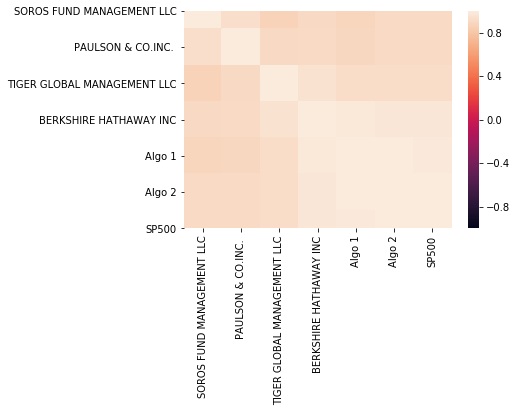

In [111]:
sns.heatmap(correlation_rolling60_ewm, vmin=-1, vmax=1)

"""
The correlation table and heatmap indicate a higher correlation between portfolio returns of Berkshire Hathaway Inc 
and Algo 1, Algo2, and S&P 500. It has a relatively lower correlation with Soros Fund Management LLC and Paulson & Co. Inc.
The correlation between 60-day rolling portfolio return of Berkshire Hathaway and S&P 500 is 0.974.
It shows tha 97.4% of the movement in exponentially weighted 60-day rolling returns can be explained 
by returns movement of S&P 500 during the same time period. 
In comparison, according to 60-day rolling SMA portfolio returns, only 0.751, i.e. 75.1% of the daily returns
can be explained by movement in S&P 500 on the same rolling basis. 
"""

In [112]:
BRK_ewm_covariance = combined_rolling60_ewm['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_rolling_ewm['SP500'])
variance_rolling60_ewm = combined_rolling60_ewm['SP500'].rolling(window=60).var()
BRK_ewm_beta = BRK_ewm_covariance / variance_rolling60_ewm

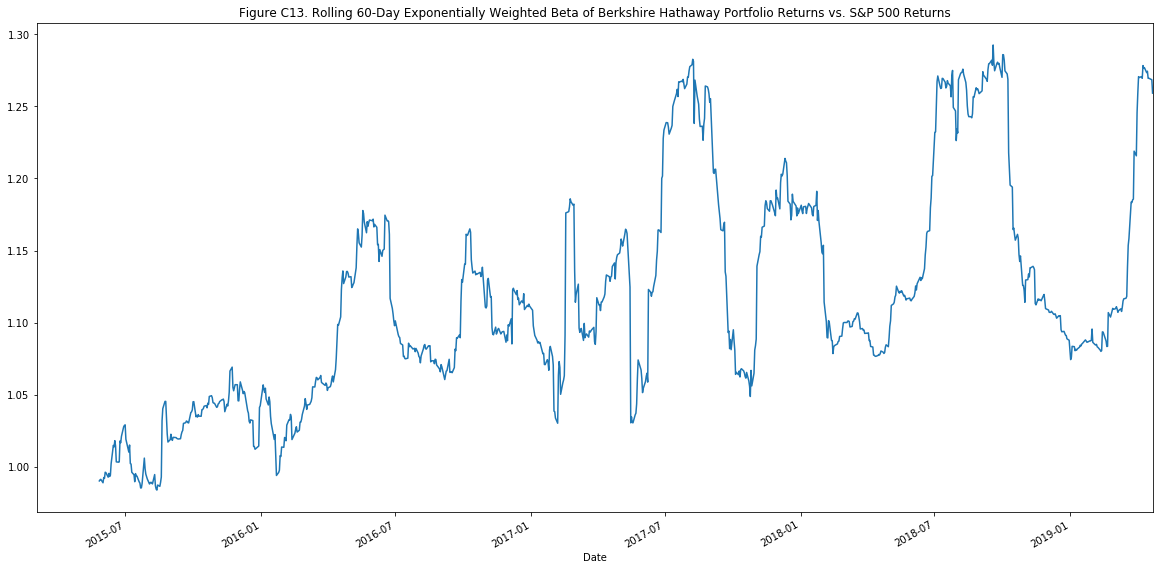

In [114]:
BRK_ewm_beta.plot(figsize=(20, 10), 
                        title='Figure C13. Rolling 60-Day Exponentially Weighted Beta of Berkshire Hathaway Portfolio Returns vs. S&P 500 Returns') 

"""Based on exponentially weighted 60-day rolling beta in Figure C13, Berkshire Hathaway Inc. has its stock price moving slightly more sentivite
compared to movement in S&P 500, in the same direction. On average, it is 25% more sensitive to market movements captured by S&P 500."""

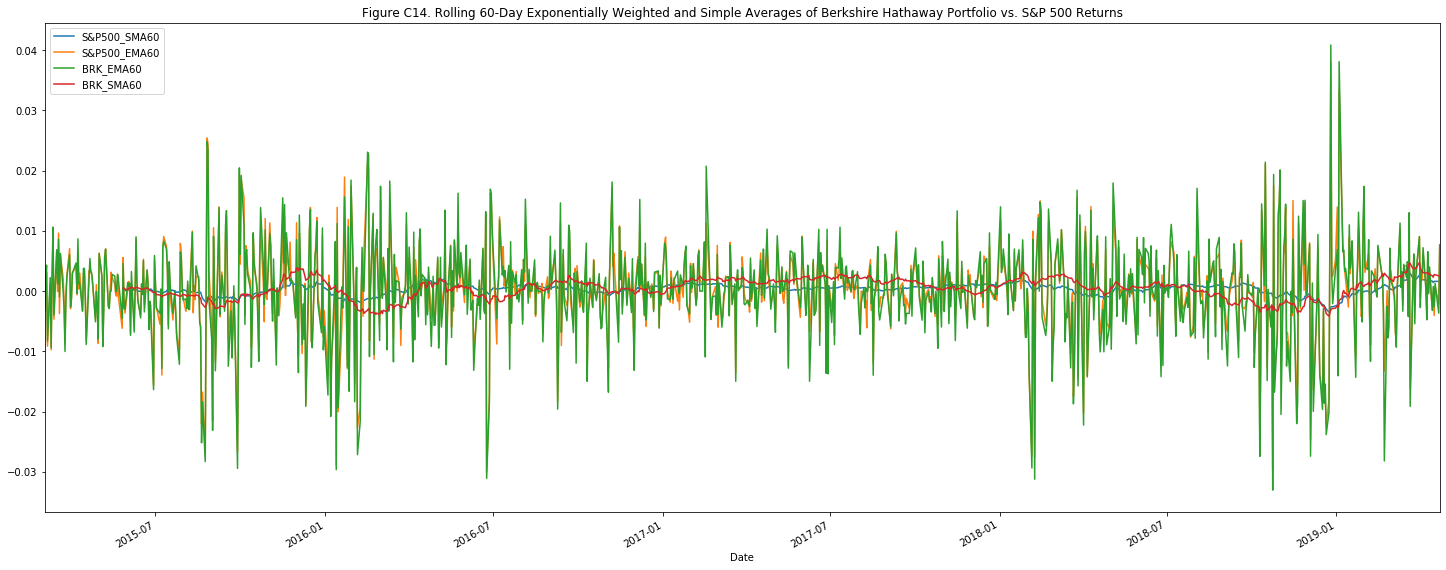

In [115]:
# Set figure of the SMA 60-day closing prices of S&P 500
mychart_rolling60 = combined_df['SP500'].rolling(window=60).mean().plot(figsize=(25,10), 
                                    title='Figure C14. Rolling 60-Day Exponentially Weighted and Simple Averages of Berkshire Hathaway Portfolio vs. S&P 500 Returns')

# Overlay EMA60 and SMA60 of Berkshire Hathaway Inc., and EMA of S&P 500 on the same figure
combined_rolling60_ewm['SP500'].plot(ax=mychart_rolling60)
combined_rolling60_ewm["BERKSHIRE HATHAWAY INC"].plot(ax=mychart_rolling60)
combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).mean().plot(ax=mychart_rolling60)

# Set the legend of the figure
mychart_rolling60.legend(["S&P500_SMA60", "S&P500_EMA60", "BRK_EMA60", "BRK_SMA60"])

"""From the chart above, Figure C14, we can see that the 60-day exponential moving averages of Berkshire Hathaway Inc react in greater magnitude and same direction compared to
returns of S&P 500, indicating a beta greater than 1. As suggested by 60-day simple moving averages of Berkshire Hathaway Inc, the company 
price move in the same direction as S&P 500. However, it demonstrate a smoother sensitivity because price changes further 
back were weighed the same as those that are closer to date, diluting the price sensitivity to movements of S&P 500"""

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [116]:
# Annualzied Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
SP500                          0.648267
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

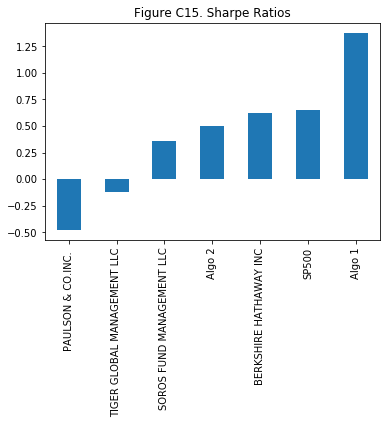

In [117]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Figure C15. Sharpe Ratios")

"""According to the bar charts in Figure C15, Algo 1 strategy outperform returns of the market index, S&P 500, and the whales. 
It is becuase its sharpe ratio is 1.25, the highest amongst all seven portfolios,
meaning that it gives the greatest return per unit of risk.
Algo 2 strategy falls below returns of S&P 500 and Berkshire Hathaway Inc by 0.15 and 0.12 in return per unit of risk,
respectively. It still beats Soros Fund Management LLC, Tiger Global Management LLC and Paulson & Co. Inc.
The last couple returns negative annualized sharpe ratios."""

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

# Stock screening on Finviz
"""
Screener on finviz.com
* Descriptive(6): 
    Market Cap. "Large ($10bln to $20bln)"
    Target Price "5% Above Price"
    Divident Yield "Positive (>0%)"
    Average Volume "Over 100K"
    IPO Date "More than 5 years ago"
    Current Volume "Over 100K"
    
* Fundamental(4):
    PE "Under 30", 
    Debt/Equity "Under 1", 
    Operating Margin "Over 5%", 
    Net Profit Margin "Positive (>0%);
    
* Technical(7):
    20-Day Simple Moving Average "Price above SMA20"
    Beta "Under 1.5"
    50-Day Simple Moving Average "SMA50 below SMA20"
    200-Day Simple Moving Average "SMA200 below SMA50"
    52-Week High/Low "New High"
    RSI(14) "Not Oversold (>50)"
    Pattern "TL Resistance"
    
* Narrowed down to seven stocks:
AJG (Financial), CFG (Financial), CI (Healthcare), 
ETN (Industrial Goods), ICE (Financial), LHX (Technology), RCL (Services)

* Looking at charts
Out of the three financial stocks: AJG, CFG and ICE, 
CFG stays in the portfolio for higher trading volume supporting the price break out.
Wave theory suggests that a peak can be formed following breaking out at $40.

Stocks remaining in the portfolio are:
CFG (Financial), CI (Healthcare), ETN (Industrial Goods), LHX (Technology), RCL (Services)

* Due to limit in resources and management challenges, 
considering volume, sectors, diversification and season, three stocks stays in the portfolio:
CFG, ETN, LHX 
"""

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [118]:
# Read the first stock
CFG_csv = Path("Resources/CFG.csv")
CFG_df = pd.read_csv(CFG_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
CFG_df.columns = ['CFG']
CFG_df.head()

CFG
Date                      
2014-12-01 16:00:00  23.98
2014-12-02 16:00:00  24.20
2014-12-03 16:00:00  24.23
2014-12-04 16:00:00  24.40
2014-12-05 16:00:00  25.15

In [119]:
# Read the second stock
ETN_csv = Path("Resources/ETN.csv")
ETN_df = pd.read_csv(ETN_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
ETN_df.columns = ['ETN']
ETN_df.head()

ETN
Date                      
2014-12-01 16:00:00  67.19
2014-12-02 16:00:00  68.50
2014-12-03 16:00:00  70.21
2014-12-04 16:00:00  69.48
2014-12-05 16:00:00  69.41

In [120]:
# Read the third stock
LHX_csv = Path("Resources/LHX.csv")
LHX_df = pd.read_csv(LHX_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
LHX_df.columns = ['LHX']
LHX_df.head()

LHX
Date                      
2014-12-01 16:00:00  71.72
2014-12-02 16:00:00  70.57
2014-12-03 16:00:00  70.36
2014-12-04 16:00:00  70.73
2014-12-05 16:00:00  71.30

In [121]:
# Concatenate all stocks into a single DataFrame
portfolio_df = pd.concat([CFG_df, ETN_df, LHX_df], axis="columns", join="inner")
portfolio_df.head()

CFG    ETN    LHX
Date                                    
2014-12-01 16:00:00  23.98  67.19  71.72
2014-12-02 16:00:00  24.20  68.50  70.57
2014-12-03 16:00:00  24.23  70.21  70.36
2014-12-04 16:00:00  24.40  69.48  70.73
2014-12-05 16:00:00  25.15  69.41  71.30

In [122]:
portfolio_df.reset_index(inplace=True)
portfolio_df['Date'] = pd.to_datetime(portfolio_df['Date']).dt.normalize()
portfolio_df.head()

Date    CFG    ETN    LHX
0 2014-12-01  23.98  67.19  71.72
1 2014-12-02  24.20  68.50  70.57
2 2014-12-03  24.23  70.21  70.36
3 2014-12-04  24.40  69.48  70.73
4 2014-12-05  25.15  69.41  71.30

In [123]:
portfolio_df.set_index("Date", inplace=True)
portfolio_df.head()

CFG    ETN    LHX
Date                           
2014-12-01  23.98  67.19  71.72
2014-12-02  24.20  68.50  70.57
2014-12-03  24.23  70.21  70.36
2014-12-04  24.40  69.48  70.73
2014-12-05  25.15  69.41  71.30

In [124]:
# Drop Nulls
portfolio_returns = portfolio_df.pct_change()
portfolio_returns.dropna(inplace=True)
portfolio_returns.head()

CFG       ETN       LHX
Date                                    
2014-12-02  0.009174  0.019497 -0.016035
2014-12-03  0.001240  0.024964 -0.002976
2014-12-04  0.007016 -0.010397  0.005259
2014-12-05  0.030738 -0.001007  0.008059
2014-12-08 -0.004374 -0.021467 -0.000561

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [125]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio = portfolio_returns.dot(weights)
portfolio.head()

Date
2014-12-02    0.004212
2014-12-03    0.007742
2014-12-04    0.000626
2014-12-05    0.012596
2014-12-08   -0.008800
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [126]:
portfolios_df = pd.concat([portfolio, combined_df], axis="columns", join="inner")
portfolios_df.sort_index(inplace=True)
portfolios_df.columns = ['DIY',
                         'SOROS FUND MANAGEMENT LLC',
                         'PAULSON & CO.INC.', 
                         'TIGER GLOBAL MANAGEMENT LLC', 
                         'BERKSHIRE HATHAWAY INC',
                         'Algo 1', 
                         'Algo 2', 
                         'SP500']
portfolios_df.head()

DIY  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                                 
2015-03-03 -0.005709                  -0.001266          -0.004981   
2015-03-04 -0.008615                   0.002230           0.003241   
2015-03-05  0.002616                   0.004016           0.004076   
2015-03-06 -0.008444                  -0.007905          -0.003574   
2015-03-09 -0.002448                   0.000582           0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

In [127]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolios_df.dropna(inplace=True)
portfolios_df.head()

DIY  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                                 
2015-03-03 -0.005709                  -0.001266          -0.004981   
2015-03-04 -0.008615                   0.002230           0.003241   
2015-03-05  0.002616                   0.004016           0.004076   
2015-03-06 -0.008444                  -0.007905          -0.003574   
2015-03-09 -0.002448                   0.000582           0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [128]:
# Performance
cumulatives = (1 + portfolios_df).cumprod()-1
cumulatives.head()

DIY  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.  \
Date                                                                 
2015-03-03 -0.005709                  -0.001266          -0.004981   
2015-03-04 -0.014275                   0.000962          -0.001755   
2015-03-05 -0.011696                   0.004981           0.002314   
2015-03-06 -0.020041                  -0.002963          -0.001269   
2015-03-09 -0.022440                  -0.002383           0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-03-05                    -0.000681                0.004327 -0.011459   
2015-03-06                    -0.009156               -0.008828 -0.016359   
2015-03-09                    -0.003367               -0.010466 -0.021717   

              Algo 2     SP500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.001464 -0.008907  
2015-03-05  0.005794 -0.007722  
2015-03-06 -0.005733 -0.021786  
2015-03-09 -0.004437 -0.017928

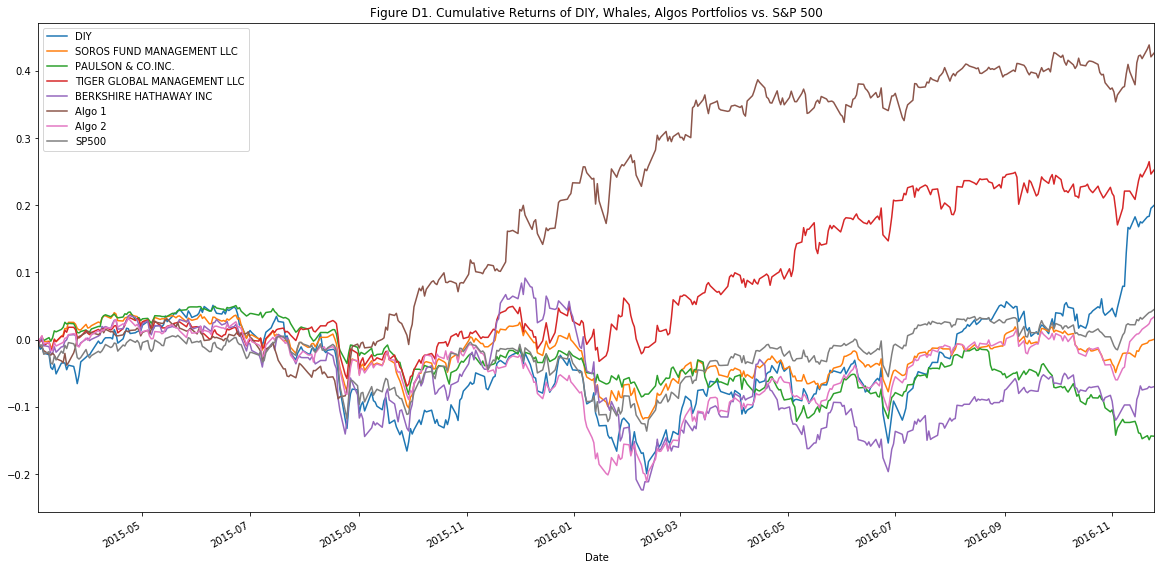

In [140]:
ax_cumulatives = cumulatives.plot(figsize=(20,10), title='Figure D1. Cumulative Returns of DIY, Whales, Algos Portfolios vs. S&P 500')

ax_cumulatives.legend(['DIY',
                       'SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
Figure D1 on cumulative returns shows that Algo 1 portfolio is producing the highest returns over the entire time frame.
Tiger Global Management LLC place the second in terms of cumulative returns. 
The DIY portfolio was experiencing a break out in returns starting from November 2016.
Paulson & Co. Inc. and Berkshire Hathaway were experiencing negative returns from February 2016.
"""

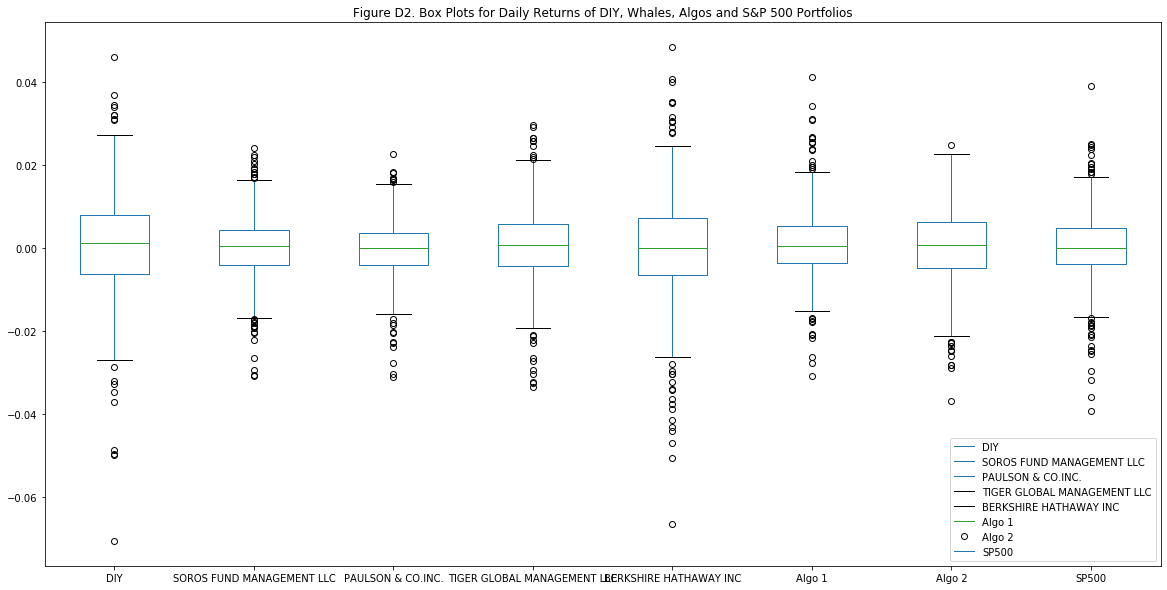

In [141]:
# Risk
# Boxplots
ax_all_boxplots = portfolios_df.plot.box(figsize=(20,10), title='Figure D2. Box Plots for Daily Returns of DIY, Whales, Algos and S&P 500 Portfolios')

ax_all_boxplots.legend(['DIY',
                        'SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
According to the box plots in Figure D2, the portfolio by Berkshire Hathaway Inc is the most risky because its daily returns has one of the greatest IQR, 
suggesting the spread of middle 50% of the daily returns was large. Furthermore, the returns were widely spread out as shown 
from -0.07 to 0.05. 

The DIY portfolio has IQR of approximately 0.02, indicating the middle 50% of daily returns spreaded out over 0.02. In addition, the range 
of daily return was close to 0.12, one of the highest among the portfolios.

Daily returns are closely packed around the center for Paulson & Co. Inc. and Soros Fund Management LLC. It is fair to conclued that
those two portfolios are the least volatile and offers returns more closely around the descriptive statistic of its center, i.e. median
of daily returns in this case.
"""

In [142]:
portfolios_std = portfolios_df.std()
portfolios_std.sort_values(inplace=True)
portfolios_std

PAULSON & CO.INC.              0.007388
SOROS FUND MANAGEMENT LLC      0.008045
Algo 1                         0.008746
SP500                          0.009228
Algo 2                         0.009335
TIGER GLOBAL MANAGEMENT LLC    0.009487
DIY                            0.013073
BERKSHIRE HATHAWAY INC         0.013592
dtype: float64

In [143]:
portfolios_volatility = portfolios_df.std() * np.sqrt(252)
portfolios_volatility.sort_values(inplace=True)
portfolios_volatility

PAULSON & CO.INC.              0.117282
SOROS FUND MANAGEMENT LLC      0.127716
Algo 1                         0.138839
SP500                          0.146488
Algo 2                         0.148193
TIGER GLOBAL MANAGEMENT LLC    0.150609
DIY                            0.207535
BERKSHIRE HATHAWAY INC         0.215770
dtype: float64

"""
Annualized standard deviations of the portfolios suggest that
the riskiness of portfolio ranking from the highest to the lowest are:
Berkshire Hathaway Inc, DIY, Tigher Global Management, Algo 2, S&P 500, Algo 1, Soros Fund Management LLC and Paulson & Co. Inc.,
in that order. The conclusion is consistent with the standard deviations of daily returns on portfolio investments.
"""

"""Differences in standard deviations and volatilities are due to mutual time frame:
    12/2014 to 1/2020 for this section vs. 5/2014 to 5/2019 
    in previous section without the DIY portfolio"""

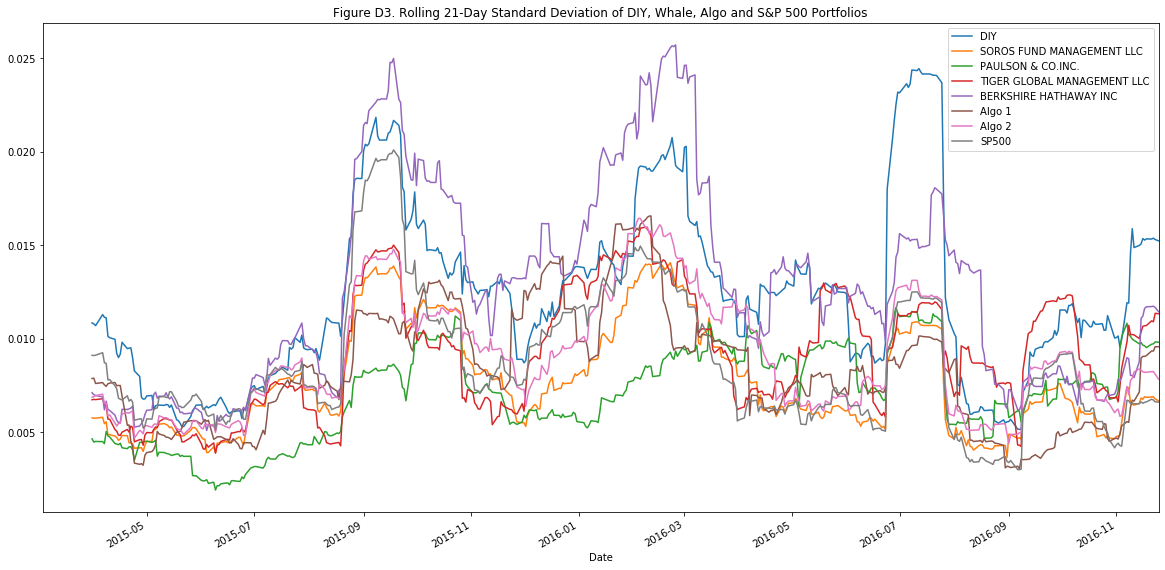

In [144]:
# Rolling
# Rolling 21-day standard deviation of S&P 500
SP500_rolling21_std = SP500_df.rolling(window=21).std()
ax_rolling21_std = portfolios_df.rolling(window=21).std().plot(figsize=(20,10), title='Figure D3. Rolling 21-Day Standard Deviation of DIY, Whale, Algo and S&P 500 Portfolios')

ax_rolling21_std.legend(['DIY',
                         'SOROS FUND MANAGEMENT LLC',
                       'PAULSON & CO.INC.',
                       'TIGER GLOBAL MANAGEMENT LLC',
                       'BERKSHIRE HATHAWAY INC',
                       'Algo 1',
                       'Algo 2', 
                       'SP500'])

"""
The 21-day rolling standard deviations of the portfolios presented in Figure D3 reinforces that
the most volatile and risky stock portfolio is Berkshire Hathaway Inc, followed by DIY portfolio.
The least volatile portfolio is Paulson & Co. Inc.
Soros Fund Management LLC ranks the second to the leask risky stocks.
"""

In [145]:
# Beta
DIY_covariance = portfolios_df['DIY'].rolling(window=21).cov(portfolios_df['SP500'])
variance_portfolios = portfolios_df['SP500'].rolling(window=21).var()
DIY_beta = DIY_covariance / variance_portfolios
DIY_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2016-11-18    1.422281
2016-11-21    1.370546
2016-11-22    1.383152
2016-11-23    1.375931
2016-11-25    1.403246
Length: 440, dtype: float64

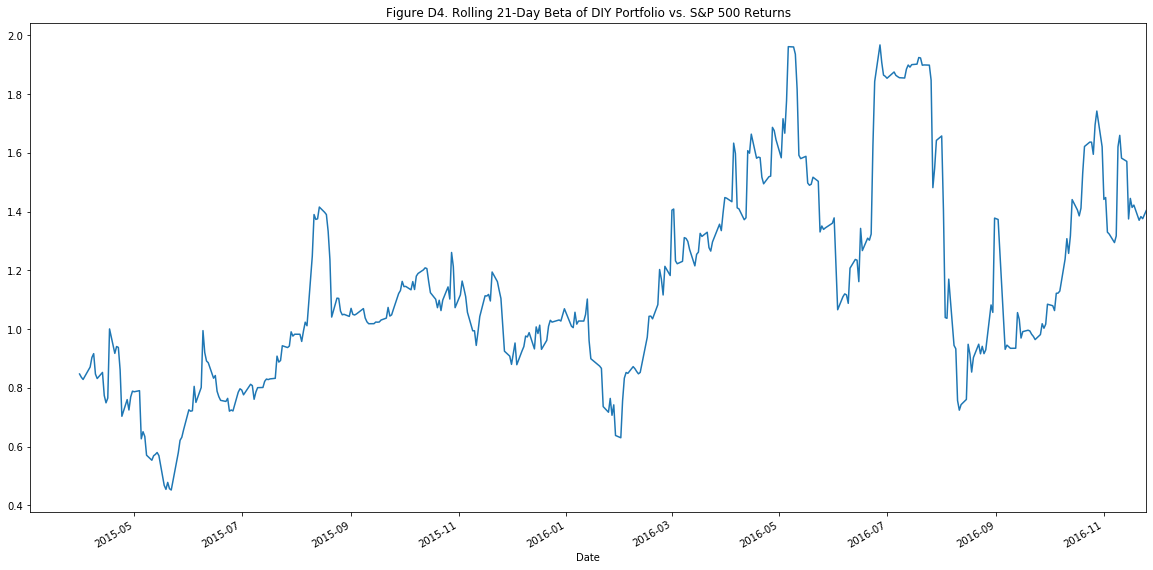

In [146]:
DIY_beta.plot(figsize=(20, 10), 
                        title='Figure D4. Rolling 21-Day Beta of DIY Portfolio vs. S&P 500 Returns') 

"""
Since the line traced in Figure D4 is all above zero, the DIY portfolio moves in the same direction as S&P 500 index. 
Beta ranged from 0.45 to 1.95, suggesting that the movement in daily return of DIY portfolio could vary 
from half the magnitude to reacting twice as much to information on the market, such as news.
"""

In [147]:
# Annualzied Sharpe Ratios
sharpe_ratios_DIY = (portfolios_df.mean() * 252) / (portfolios_df.std() * np.sqrt(252))
sharpe_ratios_DIY.sort_values(inplace=True)
sharpe_ratios_DIY

PAULSON & CO.INC.             -0.699145
BERKSHIRE HATHAWAY INC        -0.083812
SOROS FUND MANAGEMENT LLC      0.066831
Algo 2                         0.204433
SP500                          0.246505
DIY                            0.608291
TIGER GLOBAL MANAGEMENT LLC    0.933866
Algo 1                         1.536673
dtype: float64

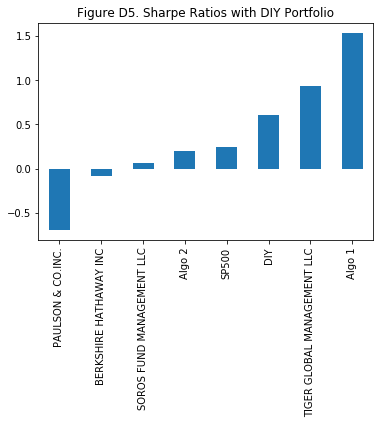

In [148]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_DIY.plot(kind="bar", title="Figure D5. Sharpe Ratios with DIY Portfolio")

"""
The DIY portfolio beats the return per unit risk taken of the S&P 500 portfolio. 
As suggested by Sharpe Ratios with graphial representations in Figure D5, Algo 1 portfolio returns the highest
for each unit of risk taken. It is followed by Tiger Global Management LLC and DIY portfolio. 
All three beats S&P 500 return per unit risk. The return per unit risk was approximately 7 times as high as 
that of S&P 500 portfolio for Algo 1, three times as much for Tiger Global Management LLC, and
more than twice the S&P 500 return per unit risk for the DIY portfolio consisting of three stocks.
A good strategy is to avoid the portfolio of Paulson & Co. Inc. as it returns a negative Sharpe ratio.
A diversifying strategy aiming higher reward-to-risk ratio would be putting higher weights on Algo 1,
Tiger Global Management LLC and DIY portfolios during the time period. 
"""

## Include correlation analysis to determine which stocks (if any) are correlated

In [149]:
correlation_portfolios = portfolios_df.corr()
correlation_portfolios

DIY  SOROS FUND MANAGEMENT LLC  \
DIY                          1.000000                   0.730997   
SOROS FUND MANAGEMENT LLC    0.730997                   1.000000   
PAULSON & CO.INC.            0.553045                   0.730772   
TIGER GLOBAL MANAGEMENT LLC  0.578423                   0.707671   
BERKSHIRE HATHAWAY INC       0.566443                   0.746833   
Algo 1                       0.233932                   0.378289   
Algo 2                       0.759646                   0.867273   
SP500                        0.795143                   0.871962   

                             PAULSON & CO.INC.  TIGER GLOBAL MANAGEMENT LLC  \
DIY                                   0.553045                     0.578423   
SOROS FUND MANAGEMENT LLC             0.730772                     0.707671   
PAULSON & CO.INC.                     1.000000                     0.492128   
TIGER GLOBAL MANAGEMENT LLC           0.492128                     1.000000   
BERKSHIRE HATHAWAY INC                0.541528                     0.563446   
Algo 1                                0.264719                     0.262292   
Algo 2                                0.648407                     0.653986   
SP500                                 0.653131                     0.797335   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
DIY                                        0.566443  0.233932  0.759646   
SOROS FUND MANAGEMENT LLC                  0.746833  0.378289  0.867273   
PAULSON & CO.INC.                          0.541528  0.264719  0.648407   
TIGER GLOBAL MANAGEMENT LLC                0.563446  0.262292  0.653986   
BERKSHIRE HATHAWAY INC                     1.000000  0.348863  0.650191   
Algo 1                                     0.348863  1.000000  0.296456   
Algo 2                                     0.650191  0.296456  1.000000   
SP500                                      0.704995  0.314907  0.857638   

                                SP500  
DIY                          0.795143  
SOROS FUND MANAGEMENT LLC    0.871962  
PAULSON & CO.INC.            0.653131  
TIGER GLOBAL MANAGEMENT LLC  0.797335  
BERKSHIRE HATHAWAY INC       0.704995  
Algo 1                       0.314907  
Algo 2                       0.857638  
SP500                        1.000000

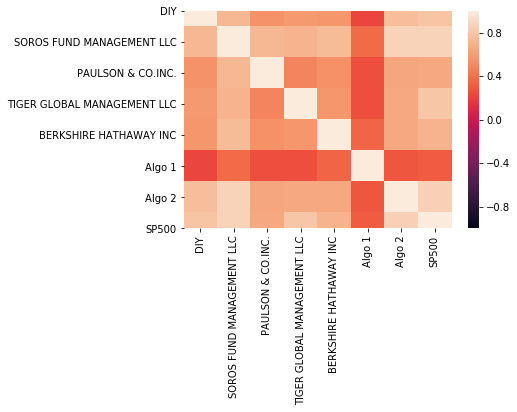

In [150]:
sns.heatmap(correlation_portfolios, vmin=-1, vmax=1)

"""
As suggested by the numerical correlation table and heatmap on portfolio daily returns,
the DIY portfolio has a lower correlation with Algo 1, Algo 2, Tiger Global Management LLC and Paulson & Co. Inc.
It shows that less of the returns from DIY portfolio could be explained by performances of those portfolios.
The opposite holds true to other portfolios as it has a higher correlation 
with Soros Fund Management LLC and Birkshire Hathaway, Inc., indicated by the lighter color on the correlation heatmap.
"""

In [151]:
# Exponential Weighted Average:
portfolios_rolling_ewm = portfolios_df.ewm(halflife=21,axis=1).mean()
portfolios_rolling_ewm_std = portfolios_df.ewm(halflife=21,axis=1).std()

In [152]:
correlation_portfolios_ewm = portfolios_rolling_ewm.corr()
correlation_portfolios_ewm

DIY  SOROS FUND MANAGEMENT LLC  \
DIY                          1.000000                   0.958804   
SOROS FUND MANAGEMENT LLC    0.958804                   1.000000   
PAULSON & CO.INC.            0.907634                   0.973855   
TIGER GLOBAL MANAGEMENT LLC  0.874377                   0.954444   
BERKSHIRE HATHAWAY INC       0.832621                   0.930183   
Algo 1                       0.804536                   0.908829   
Algo 2                       0.816905                   0.922821   
SP500                        0.823396                   0.927733   

                             PAULSON & CO.INC.  TIGER GLOBAL MANAGEMENT LLC  \
DIY                                   0.907634                     0.874377   
SOROS FUND MANAGEMENT LLC             0.973855                     0.954444   
PAULSON & CO.INC.                     1.000000                     0.973141   
TIGER GLOBAL MANAGEMENT LLC           0.973141                     1.000000   
BERKSHIRE HATHAWAY INC                0.946876                     0.970946   
Algo 1                                0.925936                     0.949106   
Algo 2                                0.937325                     0.957016   
SP500                                 0.939492                     0.962903   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
DIY                                        0.832621  0.804536  0.816905   
SOROS FUND MANAGEMENT LLC                  0.930183  0.908829  0.922821   
PAULSON & CO.INC.                          0.946876  0.925936  0.937325   
TIGER GLOBAL MANAGEMENT LLC                0.970946  0.949106  0.957016   
BERKSHIRE HATHAWAY INC                     1.000000  0.981762  0.982510   
Algo 1                                     0.981762  1.000000  0.994591   
Algo 2                                     0.982510  0.994591  1.000000   
SP500                                      0.983325  0.990490  0.997726   

                                SP500  
DIY                          0.823396  
SOROS FUND MANAGEMENT LLC    0.927733  
PAULSON & CO.INC.            0.939492  
TIGER GLOBAL MANAGEMENT LLC  0.962903  
BERKSHIRE HATHAWAY INC       0.983325  
Algo 1                       0.990490  
Algo 2                       0.997726  
SP500                        1.000000

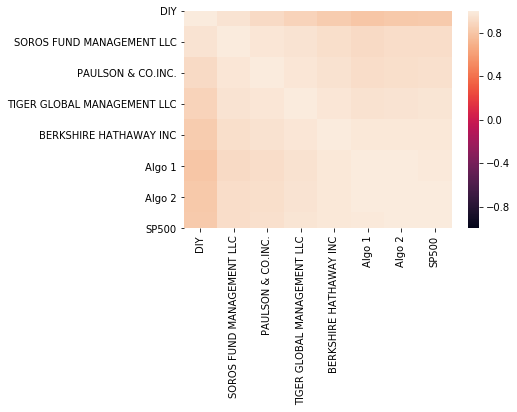

In [153]:
sns.heatmap(correlation_portfolios_ewm, vmin=-1, vmax=1)

"""
The correlation heatmap between 21-day rolling exponential moving averages of the portfolios shows that
the DIY portfolio has a higher correlation between Soros Fund Managment Inc, and lowest correlation with Algo 1 portfolio.
There is a positive correlation between DIY portfolio and S&P 500. 
The correlation between DIY and S&P 500 portfolios are 0.823. 
In other words, 82.3% of the daily returns on DIY portfolio can be explained by daily movement of S&P 500 returns. 
All portfolios are positively correlated.
"""

In [154]:
DIY_ewm_covariance = portfolios_rolling_ewm['DIY'].rolling(window=21).cov(portfolios_rolling_ewm['SP500'])
DIY_ewm = portfolios_rolling_ewm['SP500'].rolling(window=21).var()
DIY_ewm_beta = Algo2_ewm_covariance / variance_ewm
DIY_ewm_beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.975779
2019-04-17    0.977871
2019-04-18    0.976099
2019-04-22    0.978417
2019-04-23    0.992958
Length: 1043, dtype: float64

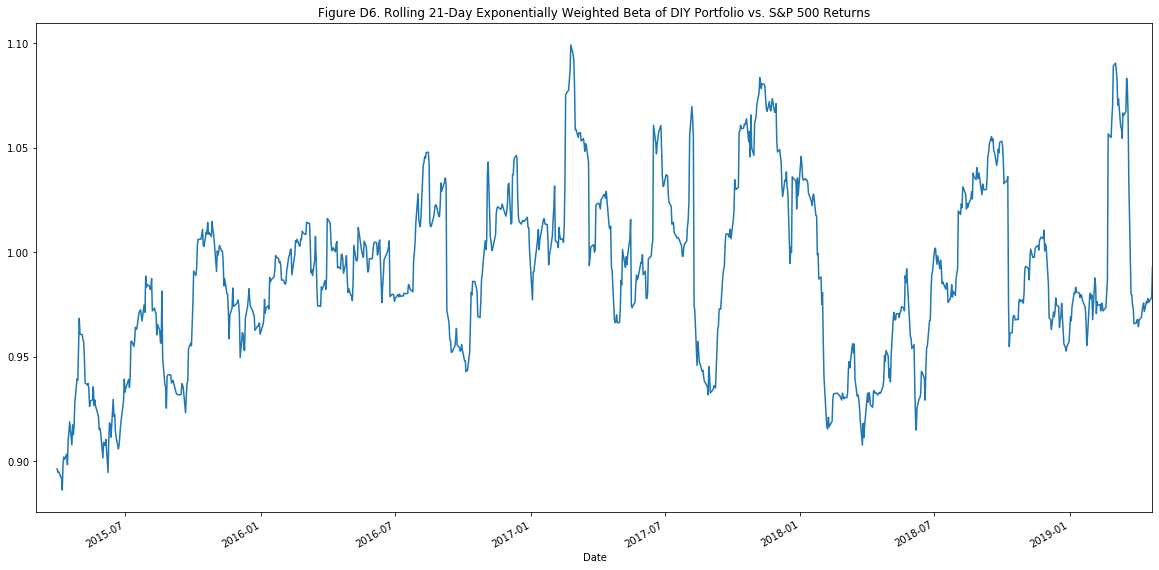

In [155]:
DIY_ewm_beta.plot(figsize=(20, 10), 
                        title='Figure D6. Rolling 21-Day Exponentially Weighted Beta of DIY Portfolio vs. S&P 500 Returns') 

"""
Accordint to the exponentially weighted 21-day moving average of DIY portfolio, it appears in Figure D6 that 
its beta is hovering around 1.00, from 0.85 to 1.10 approximately. 
Thus, its sensitivity to market movement wass more or less in tune with that of the S&P 500 portfolio. 
"""

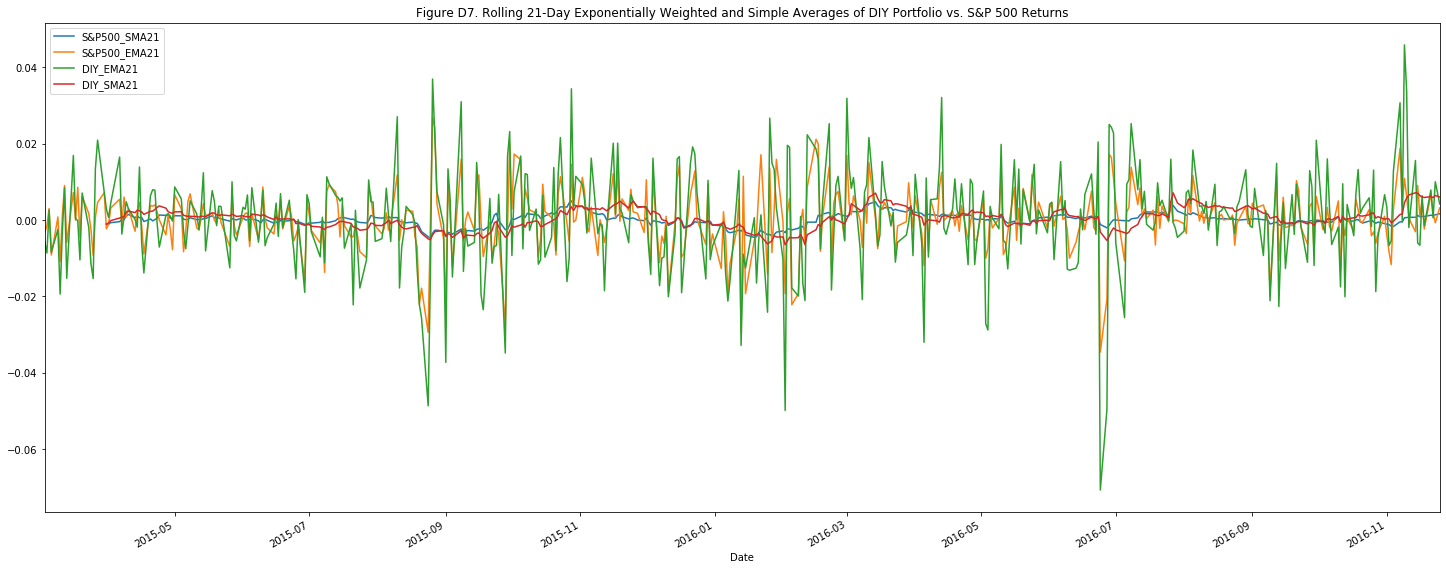

In [156]:
# Set figure of the SMA 21-day closing prices of S&P 500
mychart_DIY = portfolios_df['SP500'].rolling(window=21).mean().plot(figsize=(25,10), 
                                    title='Figure D7. Rolling 21-Day Exponentially Weighted and Simple Averages of DIY Portfolio vs. S&P 500 Returns')

# Overlay EMA21 and SMA21 of Algo 2, and EMA of S&P 500 on the same figure
portfolios_rolling_ewm['SP500'].plot(ax=mychart_DIY)
portfolios_rolling_ewm["DIY"].plot(ax=mychart_DIY)
portfolios_df['DIY'].rolling(window=21).mean().plot(ax=mychart_DIY)

# Set the legend of the figure
mychart_DIY.legend(["S&P500_SMA21", "S&P500_EMA21", "DIY_EMA21", "DIY_SMA21"])

"""
On the same chart, the exponential moving averages (EMA) appear more volatile than simple moving averages.
Illustrated in Figure D7, it is because exponents were used in calculation and magnifies changes in returns. 
We can see that the 21-day rolling returns of DIY portfolio act in concert with those of S&P 500,
demonstrated both by SMAs and EMAs. While EMAs emphasize more recent returns, it draws 
rolling correlation between DIY portfolio and S&P500 closer compared to those represented by SMAs.
The heatmap on correlation between EMAs appears to have a paler color 
compared to the SMA correlation heatmap, suggesting higher correlation between portfolio returns.
"""

"""
To select a portfolio based on data from 12/2014 to 1/2020
Based on annualized standard deviation, Berkshire Hathaway Inc. needs to be dropped 
as it was the riskiest and most volatile. Algo 2 and Soros Fund Management LLC have high correlations. 
Thus, they need to be excluded from the portfolio. 
Paulso & Co. Inc. has a negative sharpe ratio and needs to be excluded. 
"""

In [157]:
# Creating an optimized portfolio according to the criteria above
portfolios_optimized = portfolios_df.drop(columns=['PAULSON & CO.INC.','BERKSHIRE HATHAWAY INC', 'Algo 2', 'SOROS FUND MANAGEMENT LLC'])
portfolios_optimized.head()

DIY  TIGER GLOBAL MANAGEMENT LLC    Algo 1     SP500
Date                                                                 
2015-03-03 -0.005709                    -0.000496 -0.001942 -0.004539
2015-03-04 -0.008615                    -0.002534 -0.008589 -0.004389
2015-03-05  0.002616                     0.002355 -0.000955  0.001196
2015-03-06 -0.008444                    -0.008481 -0.004957 -0.014174
2015-03-09 -0.002448                     0.005843 -0.005447  0.003944

In [158]:
# For the optimized portfolio, set equal weights for the remaining four components
weights = [.25, .25, .25, .25]
portfolios_optimized_returns = portfolios_optimized.dot(weights)
portfolios_optimized_cum = (1 + portfolios_optimized_returns).cumprod() - 1
portfolios_optimized_cum.head()

Date
2015-03-03   -0.003171
2015-03-04   -0.009184
2015-03-05   -0.007893
2015-03-06   -0.016836
2015-03-09   -0.016370
dtype: float64

In [159]:
# For the unoptimized portfolio, set equal weights for the seven components
weights_portfolios = [.125, .125, .125, .125, .125, .125, .125, .125]
portfolios_returns = portfolios_df.dot(weights_portfolios)
portfolios_cum = (1 + portfolios_returns).cumprod() - 1
portfolios_cum.head()

Date
2015-03-03   -0.003306
2015-03-04   -0.004804
2015-03-05   -0.001775
2015-03-06   -0.010771
2015-03-09   -0.009985
dtype: float64

In [160]:
weights = [1]
SP500_returns = SP500_df.dot(weights).loc['2014-12-01':'2020-01-17']
sp500_cum = (1 + SP500_returns).cumprod() - 1
sp500_cum.head()

Date
2014-12-01   -0.006829
2014-12-02   -0.000488
2014-12-03    0.003274
2014-12-04    0.002109
2014-12-05    0.003777
dtype: float64

In [161]:
# DIY Portfolio
weights = [1/3, 1/3, 1/3]
portfolio = portfolio_returns.dot(weights)
portfolio.head()

Date
2014-12-02    0.004212
2014-12-03    0.007742
2014-12-04    0.000626
2014-12-05    0.012596
2014-12-08   -0.008800
dtype: float64

In [162]:
DIY_cum = (1 + portfolio).cumprod() - 1
DIY_cum.head()

Date
2014-12-02    0.004212
2014-12-03    0.011987
2014-12-04    0.012621
2014-12-05    0.025376
2014-12-08    0.016352
dtype: float64

In [163]:
cum_df = pd.concat([portfolios_optimized_cum, portfolios_cum, sp500_cum, DIY_cum], axis = "columns", join="inner") 
cum_df.columns = ['Optimized', 'All', 'SP500', 'DIY']
cum_df.head()

Optimized       All     SP500       DIY
Date                                               
2015-03-03  -0.003171 -0.003306  0.019453  0.060229
2015-03-04  -0.009184 -0.004804  0.014979  0.051095
2015-03-05  -0.007893 -0.001775  0.016193  0.053845
2015-03-06  -0.016836 -0.010771  0.001790  0.044946
2015-03-09  -0.016370 -0.009985  0.005741  0.042388

In [164]:
daily_df = pd.concat([portfolios_optimized_returns, portfolios_returns, SP500_returns, portfolio], axis = "columns", join="inner") 
daily_df.columns = ['Optimized', 'All', 'SP500', 'DIY']
daily_df.head()

Optimized       All     SP500       DIY
Date                                               
2015-03-03  -0.003171 -0.003306 -0.004539 -0.005709
2015-03-04  -0.006032 -0.001503 -0.004389 -0.008615
2015-03-05   0.001303  0.003044  0.001196  0.002616
2015-03-06  -0.009014 -0.009012 -0.014174 -0.008444
2015-03-09   0.000473  0.000794  0.003944 -0.002448

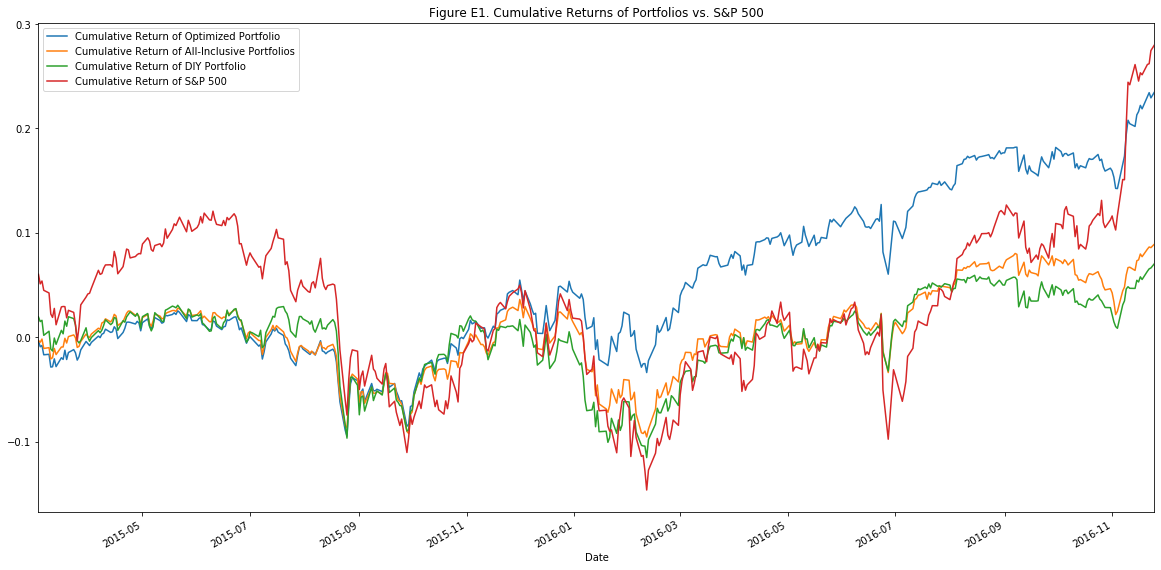

In [165]:
# Set the figure of the chart and plot each data trend on the single figure
ax_cum = cum_df.plot(figsize=(20,10), title='Figure E1. Cumulative Returns of Portfolios vs. S&P 500')


ax_cum.legend(['Cumulative Return of Optimized Portfolio',
            'Cumulative Return of All-Inclusive Portfolios',
            'Cumulative Return of DIY Portfolio',
             'Cumulative Return of S&P 500'])

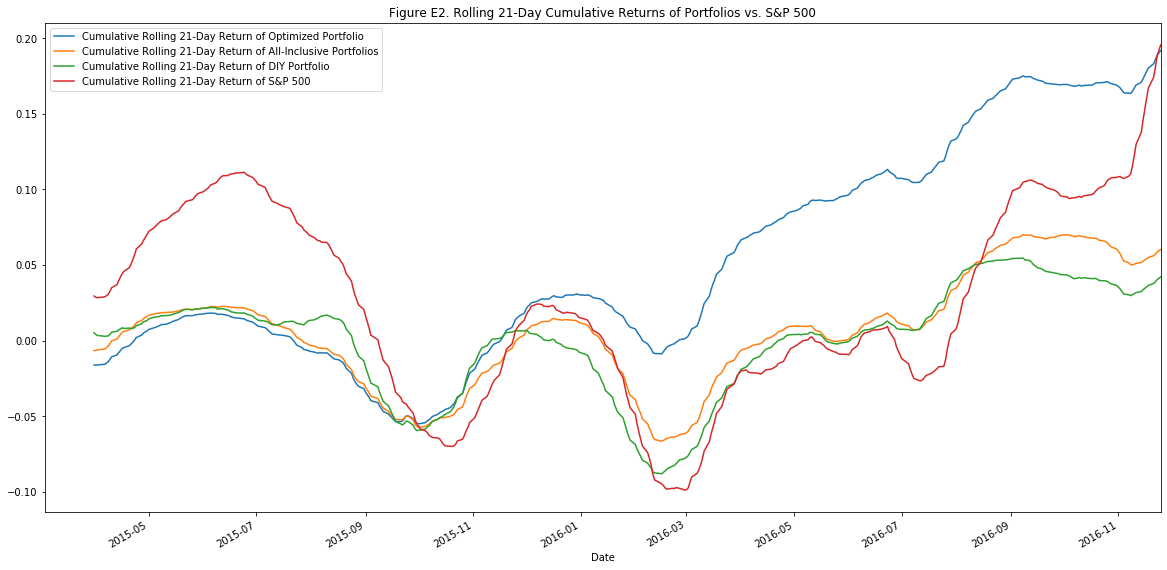

In [166]:
# Set the figure of the chart and plot each data trend on the single figure
ax_cum = cum_df.rolling(window=21).mean().plot(figsize=(20,10), title='Figure E2. Rolling 21-Day Cumulative Returns of Portfolios vs. S&P 500')


ax_cum.legend(['Cumulative Rolling 21-Day Return of Optimized Portfolio',
            'Cumulative Rolling 21-Day Return of All-Inclusive Portfolios',
            'Cumulative Rolling 21-Day Return of DIY Portfolio',
             'Cumulative Rolling 21-Day Return of S&P 500'])

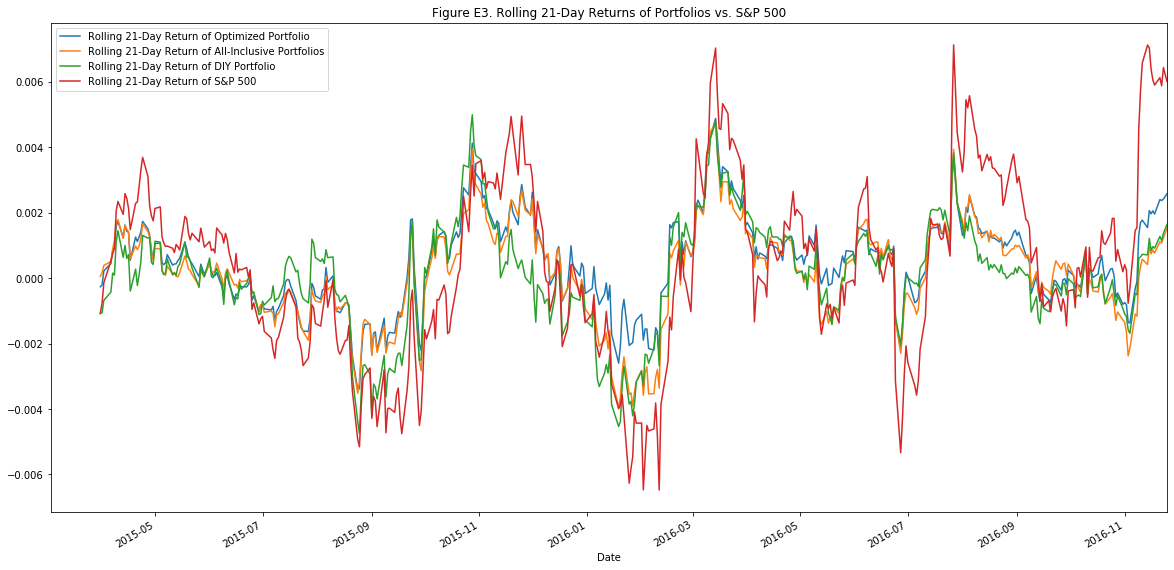

In [167]:
# Set the figure of the chart and plot each data trend on the single figure
ax_daily = daily_df.rolling(window=21).mean().plot(figsize=(20,10), title='Figure E3. Rolling 21-Day Returns of Portfolios vs. S&P 500')


ax_daily.legend(['Rolling 21-Day Return of Optimized Portfolio',
            'Rolling 21-Day Return of All-Inclusive Portfolios',
            'Rolling 21-Day Return of DIY Portfolio',
             'Rolling 21-Day Return of S&P 500'])

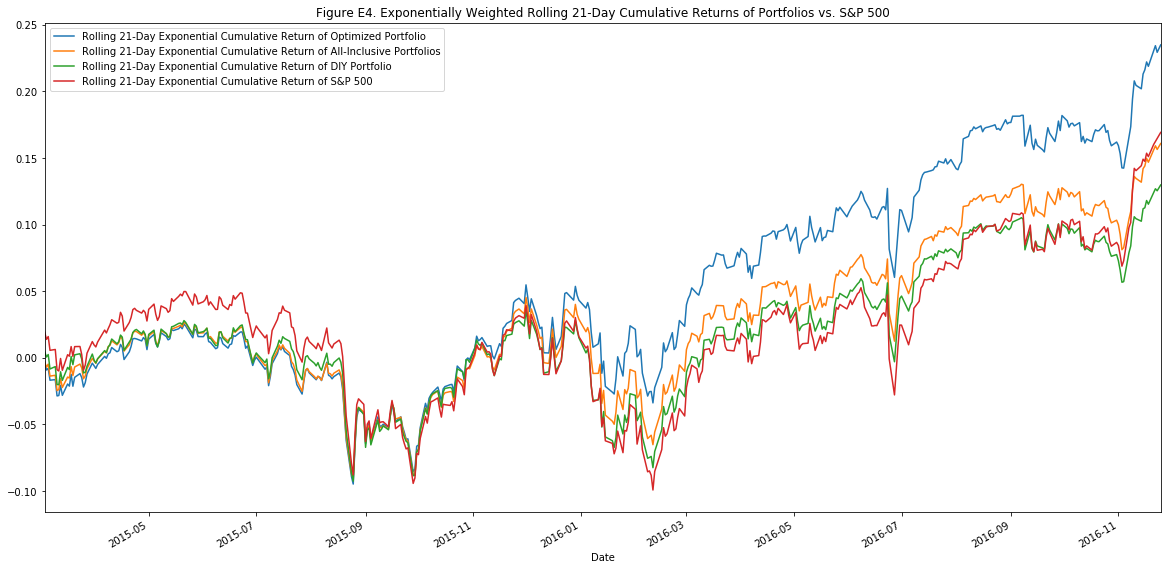

In [168]:
cum_ewm = cum_df.ewm(halflife=21,axis=1).mean()
ax_ewm21 = cum_ewm.plot(figsize=(20,10), title='Figure E4. Exponentially Weighted Rolling 21-Day Cumulative Returns of Portfolios vs. S&P 500')

ax_ewm21.legend(['Rolling 21-Day Exponential Cumulative Return of Optimized Portfolio',
            'Rolling 21-Day Exponential Cumulative Return of All-Inclusive Portfolios',
            'Rolling 21-Day Exponential Cumulative Return of DIY Portfolio',
             'Rolling 21-Day Exponential Cumulative Return of S&P 500'])

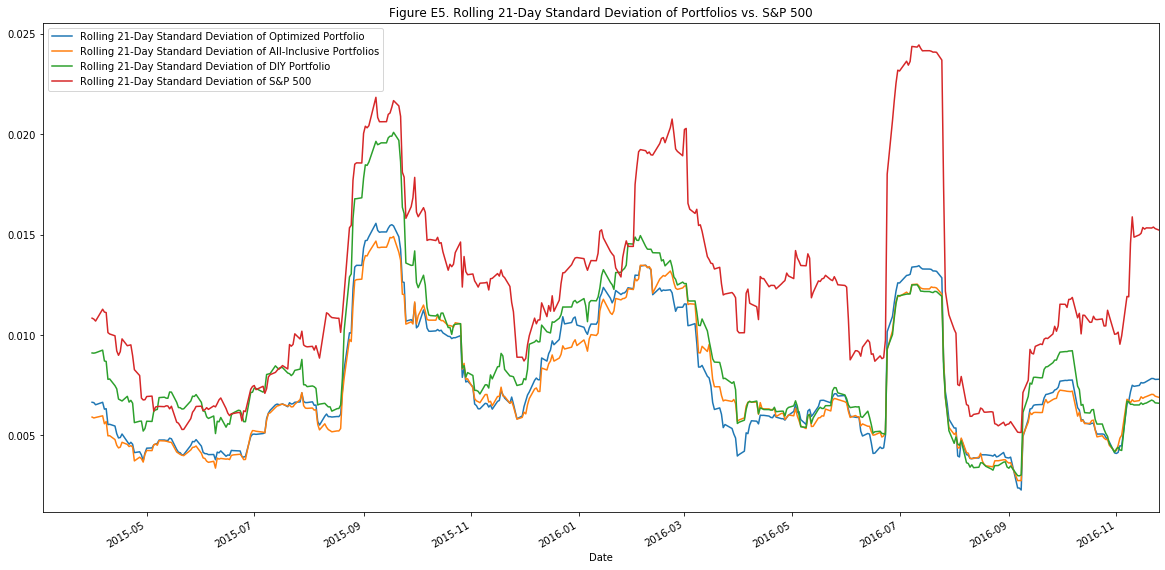

In [169]:
# Set the figure of the chart and plot each data trend on the single figure
ax_std_daily = daily_df.rolling(window=21).std().plot(figsize=(20,10), title='Figure E5. Rolling 21-Day Standard Deviation of Portfolios vs. S&P 500')


ax_std_daily.legend(['Rolling 21-Day Standard Deviation of Optimized Portfolio',
            'Rolling 21-Day Standard Deviation of All-Inclusive Portfolios',
            'Rolling 21-Day Standard Deviation of DIY Portfolio',
             'Rolling 21-Day Standard Deviation of S&P 500'])

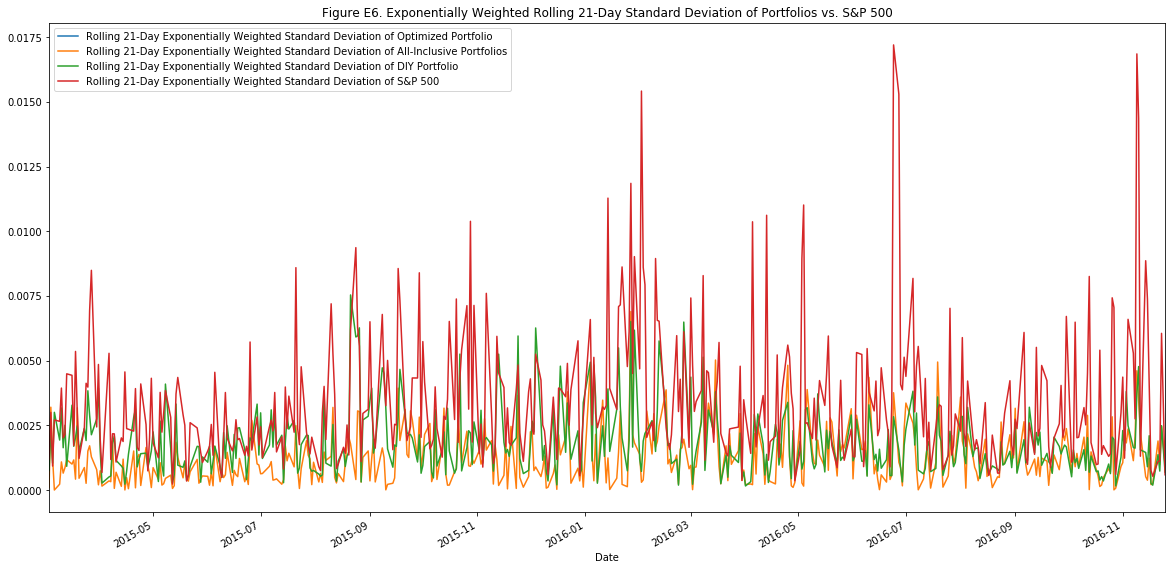

In [170]:
daily_ewm = daily_df.ewm(halflife=21,axis=1).std()
ax_daily_ewm = daily_ewm.plot(figsize=(20,10), title='Figure E6. Exponentially Weighted Rolling 21-Day Standard Deviation of Portfolios vs. S&P 500')

ax_daily_ewm.legend(['Rolling 21-Day Exponentially Weighted Standard Deviation of Optimized Portfolio',
            'Rolling 21-Day Exponentially Weighted Standard Deviation of All-Inclusive Portfolios',
            'Rolling 21-Day Exponentially Weighted Standard Deviation of DIY Portfolio',
             'Rolling 21-Day Exponentially Weighted Standard Deviation of S&P 500'])

"""

In conclusion, the Optimized Portpolio provides highest return with less risk. 

According to Exponentially Weighted Rolling 21-Day Cumulative Returns of Portfolios vs. S&P 500, Figure E4,
the Optimized Portfolio consisting of equally weighted DIY, Tiger Global Management LLC, Algo 1 and S&P 500 portfolios
has the highest return, followed by S&P 500, all-inclusive portfolio and the DIY portfolio consisted of 
euqally weighted CFG, ETN, LHX. 

The volatility of the S&P 500 is highest, followed by DIY, all-inclusive and finally the Optimized portfolio,
as shown in Figure E5. The least risky is the DIY portfolio consisted of equally weighted CFG, ETN and LHX.


Therefore, the screening strategy of dropping stocks with highest volatility, correlation and negative beta
is effective.
"""

"""
References:

* CU Fintech Bootcamp Repository retrieved at https://columbia.bootcampcontent.com/columbia-bootcamp/CU-NYC-FIN-PT-12-2019-U-C
* https://stackoverflow.com/questions/55578739/how-to-reset-index-of-multiple-pandas-dataframes-using-a-loop-in-python
* https://stackoverflow.com/questions/29310116/removing-time-from-datetime-variable-in-pandas
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
* https://support.google.com/docs/answer/3093281?hl=en
* https://finviz.com/map.ashx
* https://www.youtube.com/watch?v=bWpe30R2VnM
* https://www.youtube.com/watch?v=Bvaz9y5UP3M&t=2s
* https://www.intelligenttrendfollower.com/
* http://www.intelligenttrendfollower.com/wp-content/uploads/2018/09/ITF-Trend-Following-Mini-Course.pdf
* https://www.youtube.com/watch?v=lkM2CY2jk-Y&t=199s
* https://www.youtube.com/watch?v=cGSQNrY3g4U
* https://www.youtube.com/watch?v=N-NPaB-T-QY

"""